In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('repr'))
suppressMessages(library('GoFKernel'))
suppressMessages(library('tidyverse'))
suppressMessages(library('lubridate'))
suppressMessages(library('viridis'))
suppressMessages(library('gridExtra'))

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(GoFKernel)
library(gridExtra)
library(tibble)
library(plot3D)
library(cubature)

library(tidyr)
library(ggplot2)
library(viridis)

# Exercise 1

the number of particles emitted by a radioactive source during a fixed interval of time (∆t = 10 s) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3.

*(a) suppose a uniform prior distribution for the parameter $\mu$*
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

*(b) suppose a Jeffrey’s prior for the parameter $\mu$*
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

*(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.*


- Uniform prior: The likelihood is a Poisson distribution, and since the prior is the uniform distribution, the posterior is proportional to the likelihood and corresponds to a gamma distribution $\Gamma(\alpha, \lambda)$, with $\alpha = \sum y_{j} +1$ and $\lambda = n$ (where $y_{j}$ are the measurements).
- Jeffrey's prior: The likelihood is again a Poisson distribution, and the posterior given the Jeffrey's prior is a gamma distribution $\Gamma(\alpha, \lambda)$, with $\alpha = \sum y_{j} + \frac{1}{2}$ and $\lambda = n$ (where $y_{j}$ are the measurements).


In both cases the median is not computed analytically, since  for a Gamma function there is no simple closed form expression for it.

Uniform Distribution: 
Theoretical mean: 2.6 ; Numerical estimation: 2.6 
Theoretical variance: 0.52 ; Numerical estimation: 0.52 
Median: 2.534 
For the posterior associated to Uniform prior the 95% Credibility Interval is ( 1.384 4.192 ) 
 

Gaussian associated to  Uniform Distribution: 
Theoretical mean: 2.6 ; Numerical estimation: 2.6 
Theoretical variance: 0.52 ; Numerical estimation: 0.52 
Median: 2.6 
For the Gaussian approximation of the posterior associated to Uniform prior the 95% Credibility Interval is ( 1.187 4.013 ) and the relative error made in the approximation is ( 0.143 0.043 ) 


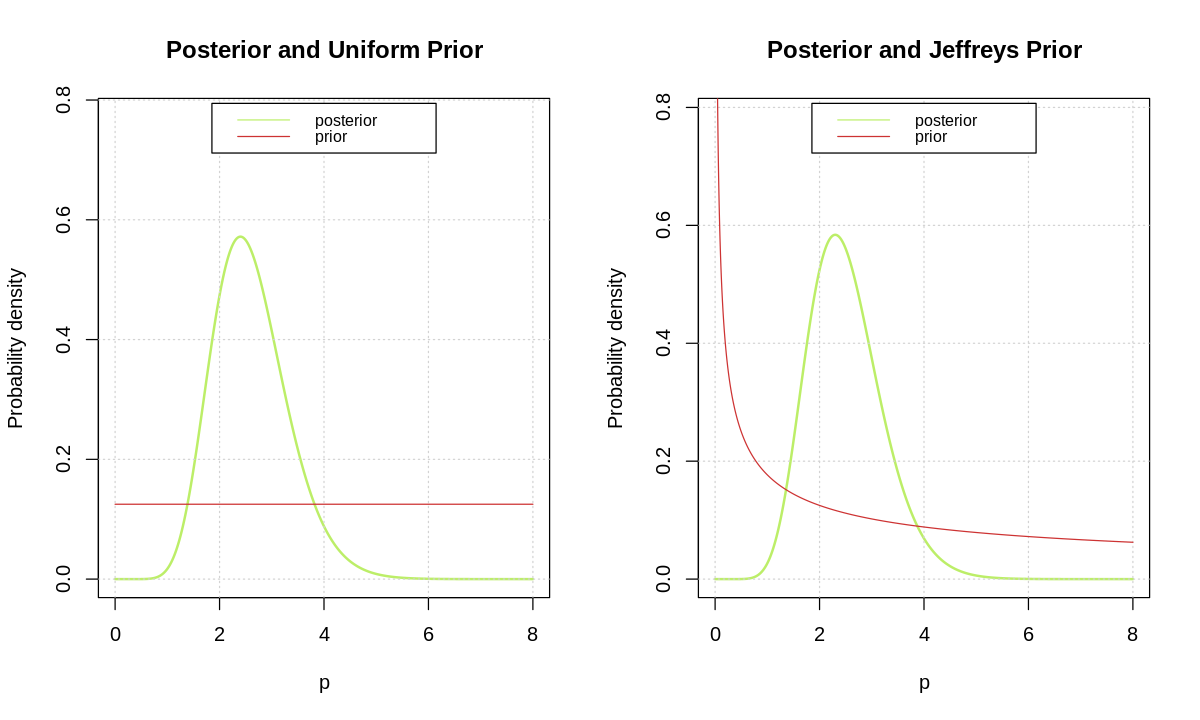

Jeffreys Distribution: 
Theoretical mean: 2.5 ; Numerical estimation: 2.5 
Theoretical variance: 0.5 ; Numerical estimation: 0.5 
Median: 2.434 
For the posterior associated to Jeffreys prior the 95% Credibility Interval is ( 1.312 4.065 ) 
 

Gaussian associated to  Jeffreys Distribution: 
Theoretical mean: 2.5 ; Numerical estimation: 2.5 
Theoretical variance: 0.5 ; Numerical estimation: 0.5 
Median: 2.5 
For the Gaussian approximation of the posterior associated to Jeffreys prior the 95% Credibility Interval is ( 1.114 3.886 ) and the relative error made in the approximation is ( 0.151 0.044 ) 


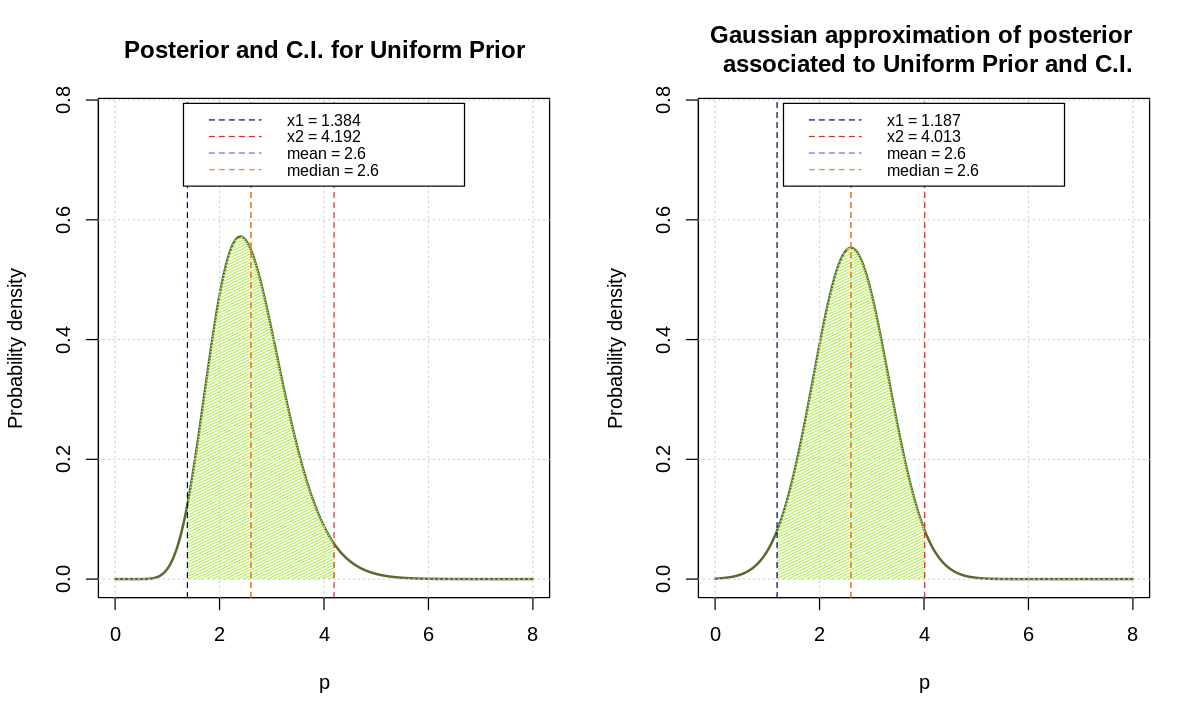

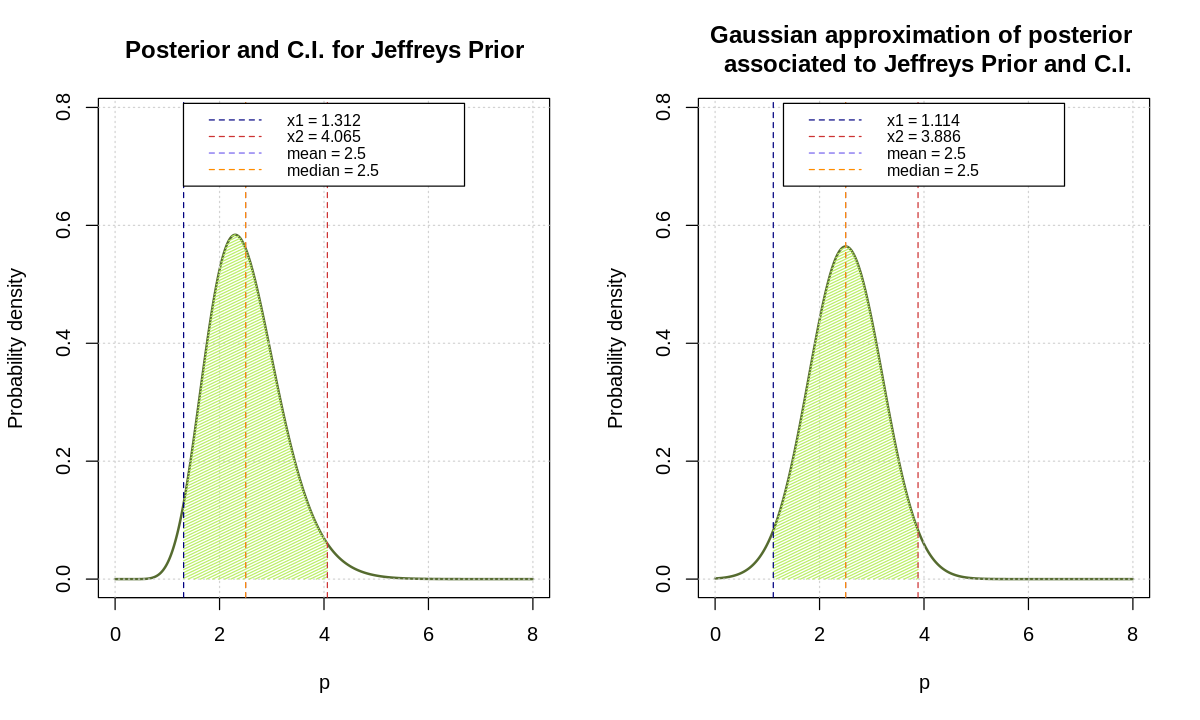

In [2]:
data <- c(4,1,3,1,3)
minp <- 0
maxp <- 8
points <- 1000
p <- seq(minp, maxp, 1/points)
q <- 0.025

norm <- integrate(function(x){1/sqrt(x)}, lower = minp, upper = maxp)$value
prior <- rbind(dunif(p, min = minp, max = maxp), 1/norm/sqrt(p))
alpha <- c(sum(data)+1, sum(data)+1/2)
name <-c('Uniform', 'Jeffreys')
n <- length(data)

options(repr.plot.width = 10, repr.plot.height = 6)

par(mfrow = c(1,2))
for (i in 1:2) {
    
    post <- dgamma(p, shape = alpha[i], rate = n)
    plot(p, post, type = 'l', col = 'darkolivegreen2', lwd = 2,
              ylab = 'Probability density', main = paste('Posterior and ', name[i] ,' Prior', sep=''),
         ylim = c(0,max(post) + 0.2))
    grid()
    lines(p, prior[i, ], lty = 1, col = 'brown3')
    legend('top', inset = c(0, 0.01), legend = c('posterior', 'prior'),
           col=c('darkolivegreen2', 'brown3'), lty=1, cex=0.8, box.lty = 1.0)
}

flush.console()
par(mfrow = c(1,1))

for (i in 1:2) {
    par(mfrow = c(1,1))
    post <- dgamma(p, shape = alpha[i], rate = n)
    min_ci <- qgamma(q, shape = alpha[i], rate = n)
    max_ci <- qgamma(1-q, shape = alpha[i], rate = n)
    median <- qgamma(0.5, shape = alpha[i], rate = n)
    mean_th <- alpha[i]/n
    var_th <- alpha[i]/n^2
    mean_comp <- integrate(function(x){x*dgamma(x, shape = alpha[i], rate = n)}, lower = 0, upper = Inf)$value
    var_comp <- integrate(function(x){x^2 * dgamma(x, shape = alpha[i], rate = n)}, lower = 0, upper = Inf)$value +
    - mean_comp^2

    cat(paste(name[i], 'Distribution: \n'))
    cat(paste('Theoretical mean:', mean_th, '; Numerical estimation:', round(mean_comp, 3), '\n'))
    cat(paste('Theoretical variance:', var_th, '; Numerical estimation:', round(var_comp, 3), '\n'))
    cat(paste('Median:', round(median, 3), '\n'))
    cat(paste('For the posterior associated to', name[i], 'prior the 95% Credibility Interval is (', round(min_ci, 3), round(max_ci, 3), ') \n'))
    
    sd_th <- sqrt(var_th)
    post_gs <- dnorm(p, mean = mean_th, sd = sd_th)
    min_gs <- qnorm(q, mean = mean_th, sd = sd_th)
    max_gs <- qnorm(1-q, mean_th, sd = sd_th)
    median <- qnorm(0.5, mean_th, sd = sd_th)
    mean_comp <- integrate(function(x){x*dnorm(x, mean = mean_th, sd = sd_th)}, lower = 0, upper = Inf)$value
    var_comp <- integrate(function(x){x^2 * dnorm(x, mean = mean_th, sd = sd_th)}, lower = 0, upper = Inf)$value +
    - mean_comp^2

    cat(paste(' \n\nGaussian associated to ', name[i], 'Distribution: \n'))
    cat(paste('Theoretical mean:', mean_th, '; Numerical estimation:', round(mean_comp, 3), '\n'))
    cat(paste('Theoretical variance:', var_th, '; Numerical estimation:', round(var_comp, 3), '\n'))
    cat(paste('Median:', round(median, 3), '\n'))
    cat(paste('For the Gaussian approximation of the posterior associated to', name[i], 'prior the 95% Credibility Interval is (', round(min_gs, 3), round(max_gs, 3), ') and the relative error made in the approximation is (', round(abs(min_gs - min_ci)/min_ci, 3), round(abs(max_gs - max_ci)/max_ci, 3), ') \n'))
    
    
    par(mfrow = c(1,2))
    plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density',
    main = paste('Posterior and C.I. for ', name[i] ,' Prior', sep=''),  ylim = c(0,max(post) + 0.2))
    grid()
    ci <- seq(min_ci, max_ci, len = 200)
    polygon(c(ci , max_ci, min_ci), c(dgamma(ci, alpha[i], n), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = min_ci, lty='dashed', col = 'navy')
    abline(v = max_ci, lty = 'dashed', col = 'brown3')
    abline(v = mean_th, lty = 'dashed', col = 'slateblue2')
    abline(v = median, lty = 'dashed', col = 'darkorange')
    legend('top', inset = c(0, 0.01), legend = c(paste('x1 = ', round(min_ci, 3), sep=''), paste('x2 = ', round(max_ci, 3), sep=''),
                                                 paste('mean = ', round(mean_th, 3), sep=''), paste('median = ', round(median, 3), sep='')),
               col=c('navy', 'brown3', 'slateblue2', 'darkorange'), lty=2, cex=0.8, box.lty = 1.0)

    
    plot(p, post_gs, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density',
     main = paste('Gaussian approximation of posterior \n associated to ', name[i] ,' Prior and C.I.', sep=''),  ylim = c(0,max(post) + 0.2))
    grid()
    ci <- seq(min_gs, max_gs, len = 200)
    polygon(c(ci , max_gs, min_gs), c(dnorm(ci, mean_th, sd_th), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = min_gs, lty='dashed', col = 'navy')
    abline(v = max_gs, lty = 'dashed', col = 'brown3')
    abline(v = mean_th, lty = 'dashed', col = 'slateblue2')
    abline(v = median, lty = 'dashed', col = 'darkorange')
    legend('top', inset = c(0, 0.01), legend = c(paste('x1 = ', round(min_gs, 3), sep=''), paste('x2 = ', round(max_gs, 3), sep=''),
                                                 paste('mean = ', round(mean_th, 3), sep=''), paste('median = ', round(median, 3), sep='')),
               col=c('navy', 'brown3', 'slateblue2', 'darkorange'), lty=2, cex=0.8, box.lty = 1.0)

}

Using the normal approximation instead of the actual posterior the results obtained are very similar; indeed there is no significant difference in the calculation of the mean, and the error made using the gaussian confidence is small.

# Exercise 2

given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

I assume that $\alpha$ and $\beta$ are independent.
The prior then can then be expressed as the product of the priors of the two parameters:

$$ P(\alpha,\beta|M) = P(\alpha|M)\cdot P(\beta|M) $$

For both $\alpha$ and $\beta$ I use a uniform prior, as for the posterior from Bayes Theorem:

  $$P(\alpha,\beta | \{y_i\},M)\propto P(\{y_i\}|\alpha,\beta,M)\cdot P(\alpha|M)\cdot P(\beta|M)$$

The chosen true values of $\alpha$ and $\beta$ are $$\alpha_{true} = 42, \ \ \beta_{true} = 24 $$

The likelihood of the model is a Cauchy distribution, that comes from considering a uniform distribution for the emission of light angle. The data then will be randomly generated from a Cauchy distribution.

[1] "True alpha: 42 , alpha found by the bayesian inference after 100 observations: 40"

[1] "True beta: 24 , beta found by the bayesian inference after 100 observations: 24.5"

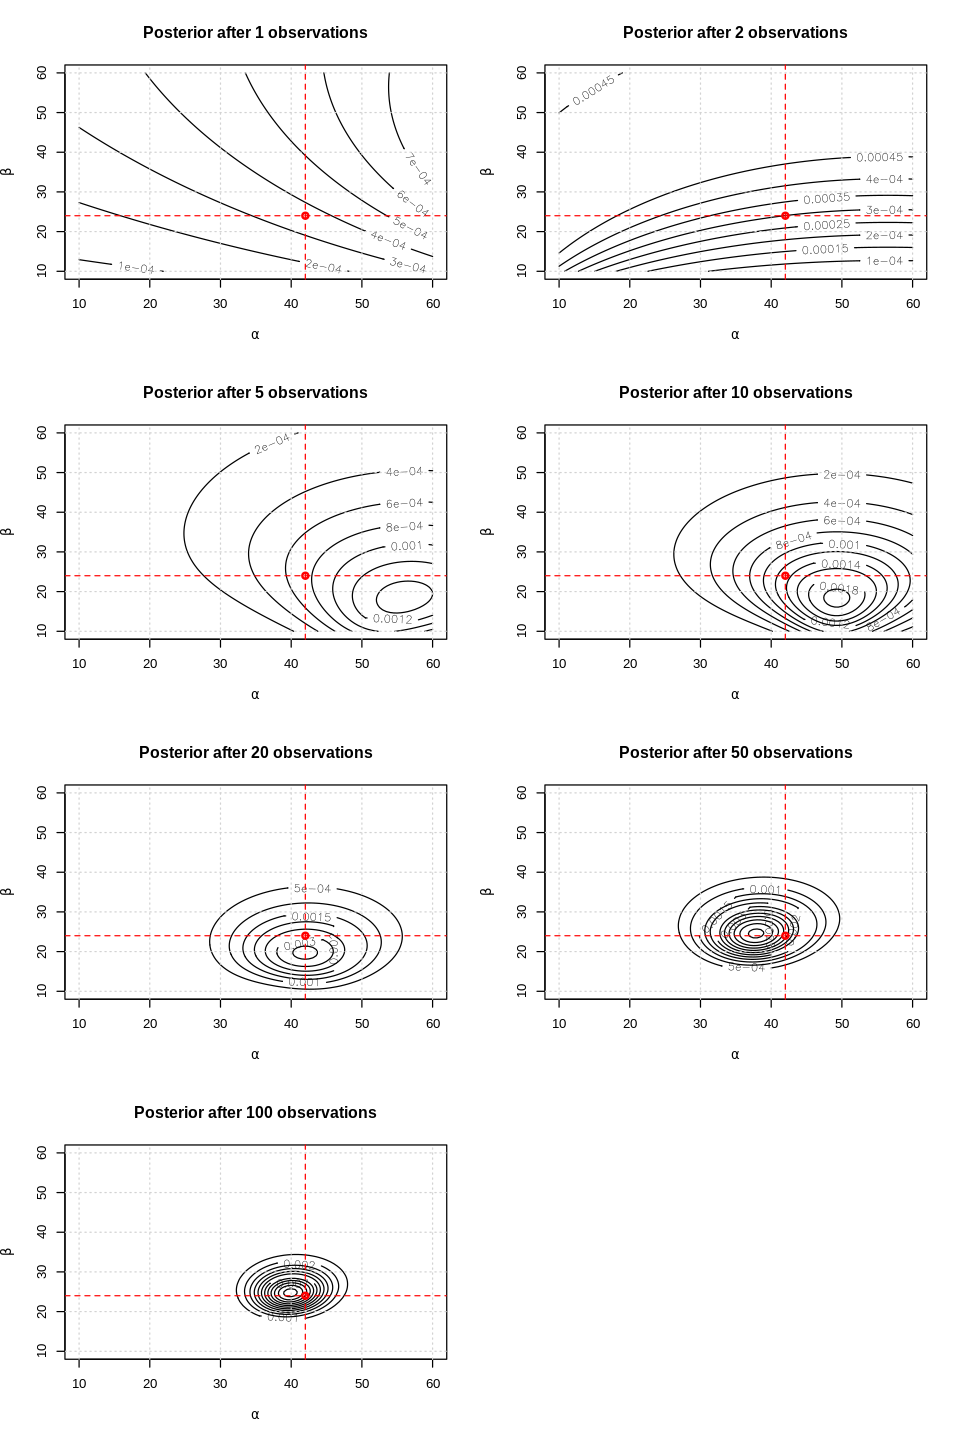

In [3]:
set.seed(1224)
true_alpha <- 42
true_beta <- 24
N <- 100

data <- rcauchy(N, scale =  true_beta, location = true_alpha)

loglike <- function(p, x){
    alpha <- p[1]
    beta <- p[2]
    sum(log((beta/pi)/(beta^2 + (x - alpha)^2)))
}

post_notnorm <- function(p, x){
    exp(loglike(p, x))
}

alpha_min <- 10
alpha_max <- 60
beta_min <- 10
beta_max <- 60
delta_a <- (alpha_max - alpha_min)/N
delta_b <- (beta_max - beta_min)/N

alpha_seq <- seq(alpha_min, alpha_max, length.out = N+1)
beta_seq <- seq(beta_min, beta_max, length.out = N+1)
pairs <- expand.grid(alpha_seq, beta_seq)

#NB: I go up to 100 measurements because increasing the number of observation the normalization 

par(mfrow = c(4,2))
options(repr.plot.width = 8, repr.plot.height = 12)
n_data <- c(1, 2, 5, 10, 20, 50, 100)
idx_best <- c()
for (n in n_data){
    Norm <- adaptIntegrate(post_notnorm, lowerLimit = c(alpha_min, beta_min), upperLimit = c(alpha_max, beta_max), x = data[1:n])$integral
    post <- apply(pairs, 1, post_notnorm, x = data[1:n])/Norm
    post_matrix <- matrix(post, nrow = length(alpha_seq))
    contour(alpha_seq, beta_seq, post_matrix, xlab = expression(alpha), ylab = expression(beta), main = paste('Posterior after', n, 'observations'))
    points(true_alpha, true_beta, pch=1, col="red", lwd=2) 
    abline(h=true_beta, lty=2, col = 'red')
    abline(v=true_alpha, lty=2, col = 'red')
    grid()
    idx <- which(post_matrix == max(post_matrix), arr.ind = TRUE)
    idx_best <- rbind(idx_best, c(alpha_seq[idx[1]],beta_seq[idx[2]]))
}

i <- c(which(post_matrix == max(post_matrix), arr.ind=TRUE))
paste('True alpha:',true_alpha, ', alpha found by the bayesian inference after', N, 'observations:', round(alpha_seq[i[1]], 3))
paste('True beta:',true_beta, ', beta found by the bayesian inference after', N, 'observations:',round(beta_seq[i[2]], 3))

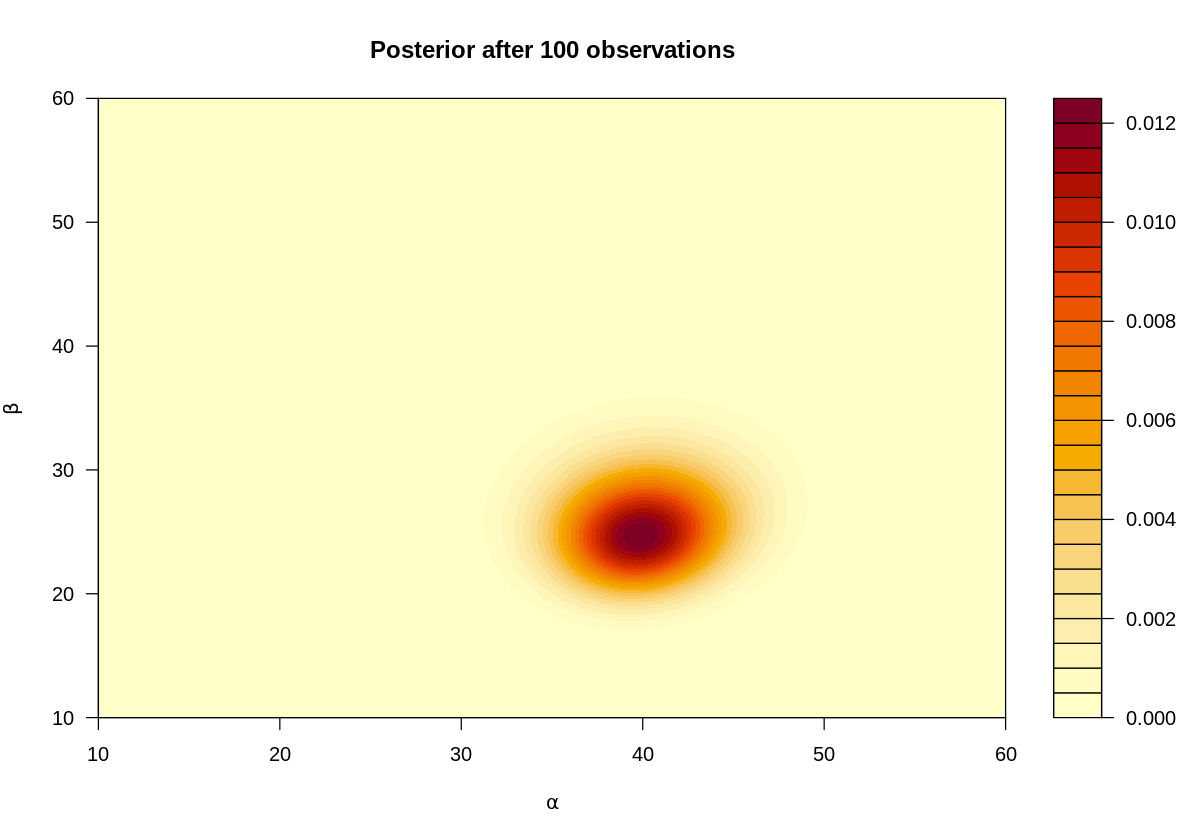

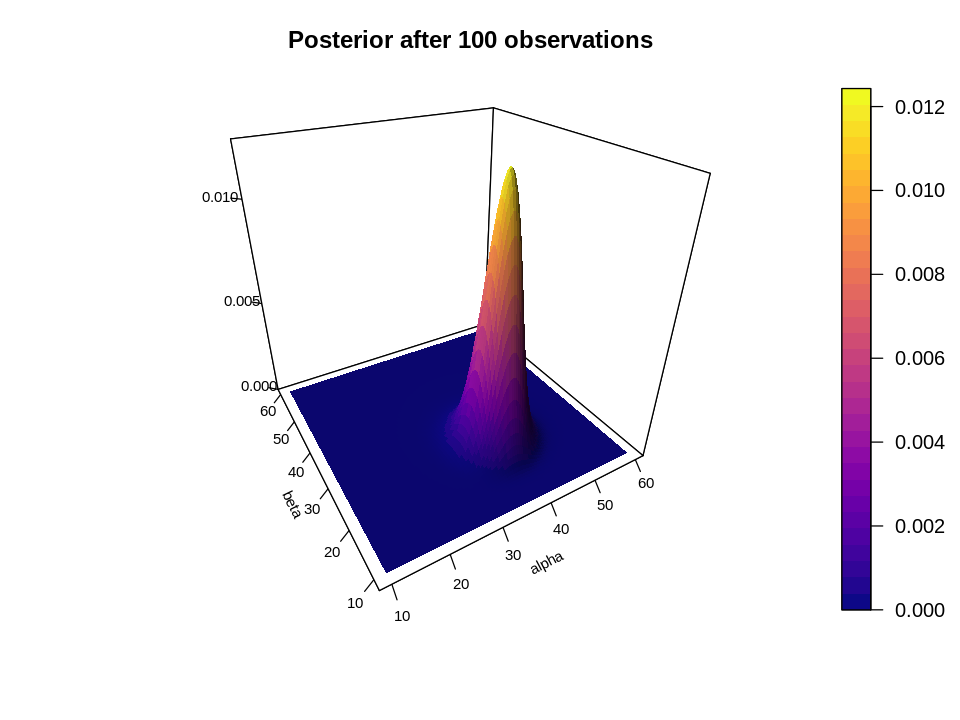

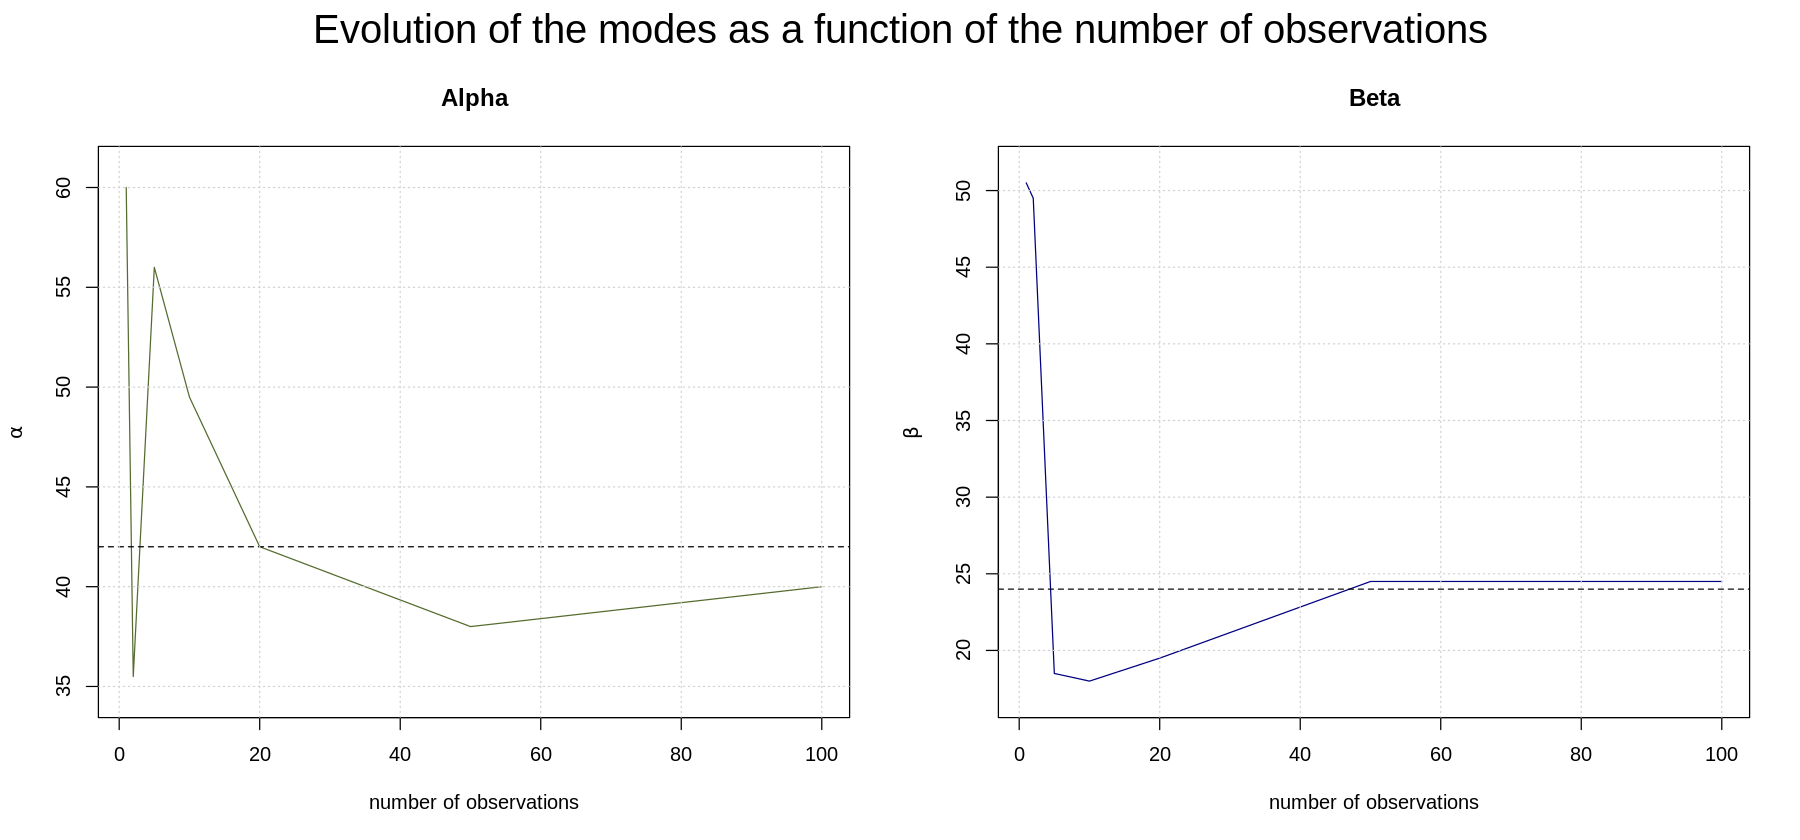

In [4]:
par(mfrow=c(1,1))
options(repr.plot.width = 10, repr.plot.height = 7)
filled.contour(alpha_seq, beta_seq, post_matrix, xlab = expression(alpha), ylab = expression(beta), main = paste('Posterior after', N, 'observations'))

options(repr.plot.width = 8, repr.plot.height = 6)
persp3D(x = alpha_seq, y = beta_seq, z = post_matrix, ticktype='detailed', xlab = expression(alpha), ylab = expression(beta), zlab='', cex.lab = 0.75, cex.axis = 0.75,
        xlim=c(alpha_min - 2 , alpha_max + 2 ), ylim=c(beta_min - 2 , beta_max + 2), zlim=c(0, max(post_matrix)), theta = -30, phi = 30, axes = T,
       main = paste('Posterior after', N, 'observations'), box = TRUE, border = NA, col = plasma(32), shade = .3)#, col = viridis(32))


alpha_est <- idx_best[,1]
beta_est <- idx_best[,2]

#Plot best params (mode) evolution
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1, 2), oma = c(0, 0, 2, 0))

plot(n_data, alpha_est, pch = 30, cex = 1.5, type='l', col = 'darkolivegreen', main = 'Alpha', xlab='number of observations', ylab=expression(alpha), ylim = c(min(alpha_est) -1, max(c(alpha_est, true_alpha)+1)))
abline(h=true_alpha, col='black',lty=2)
grid()

plot(n_data, beta_est, pch = 30, cex = 1.5, type='l', col = 'navy', main = 'Beta', xlab='number of observations', ylab=expression(beta),  ylim = c(min(beta_est) -1, max(c(beta_est, true_beta)+1)))
abline(h=true_beta, col='black',lty=2)
grid()
mtext('Evolution of the modes as a function of the number of observations', cex = 2, outer = TRUE)

The plot shows the evolution of the mode as the number of observations is increased, and it can be seen that after the initial oscillations, the values gets closer to the true value.

# Exercise 3

given the Signal over Background example discussed last week, analyze and discuss the following cases:

#### 3.1) Vary the sampling resolution used to generate the data, keeping the same sampling range
$$ xdat<- seq(from = -7w , \ to = 7w, \ by = 0.5w) $$
- change the resolution w = {0.1, 0.25, 1, 2, 3}
- check the effect on the results

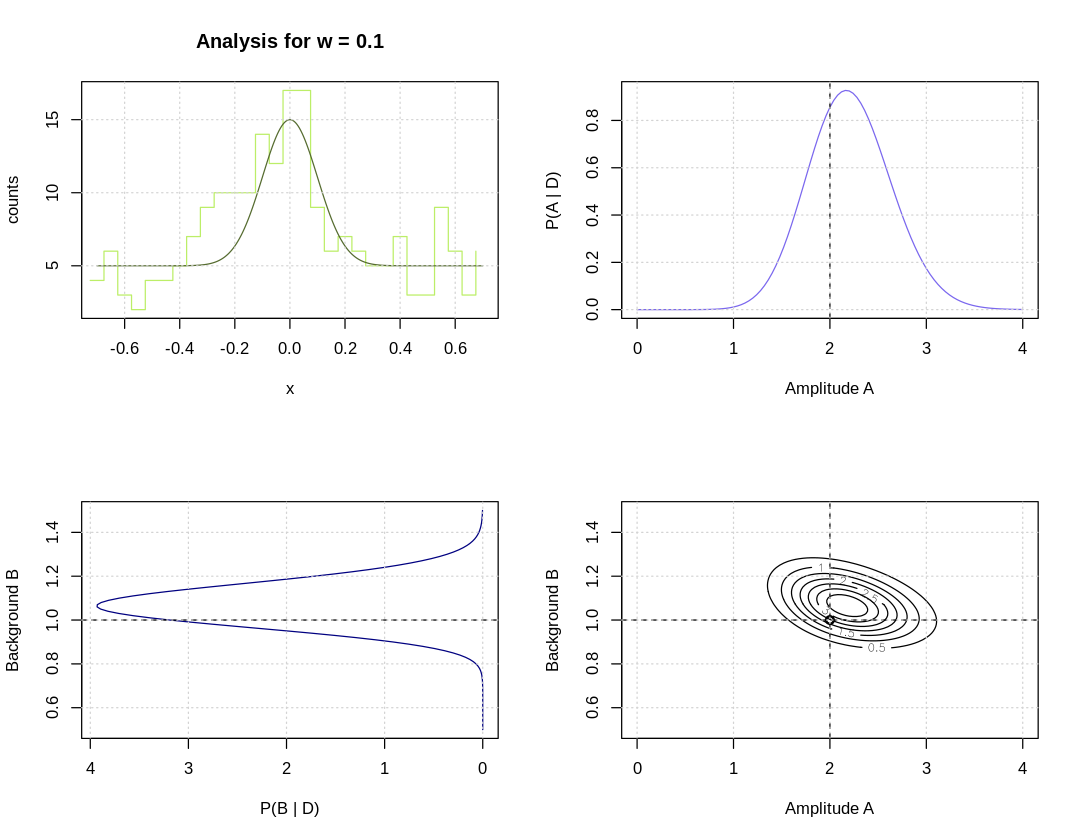

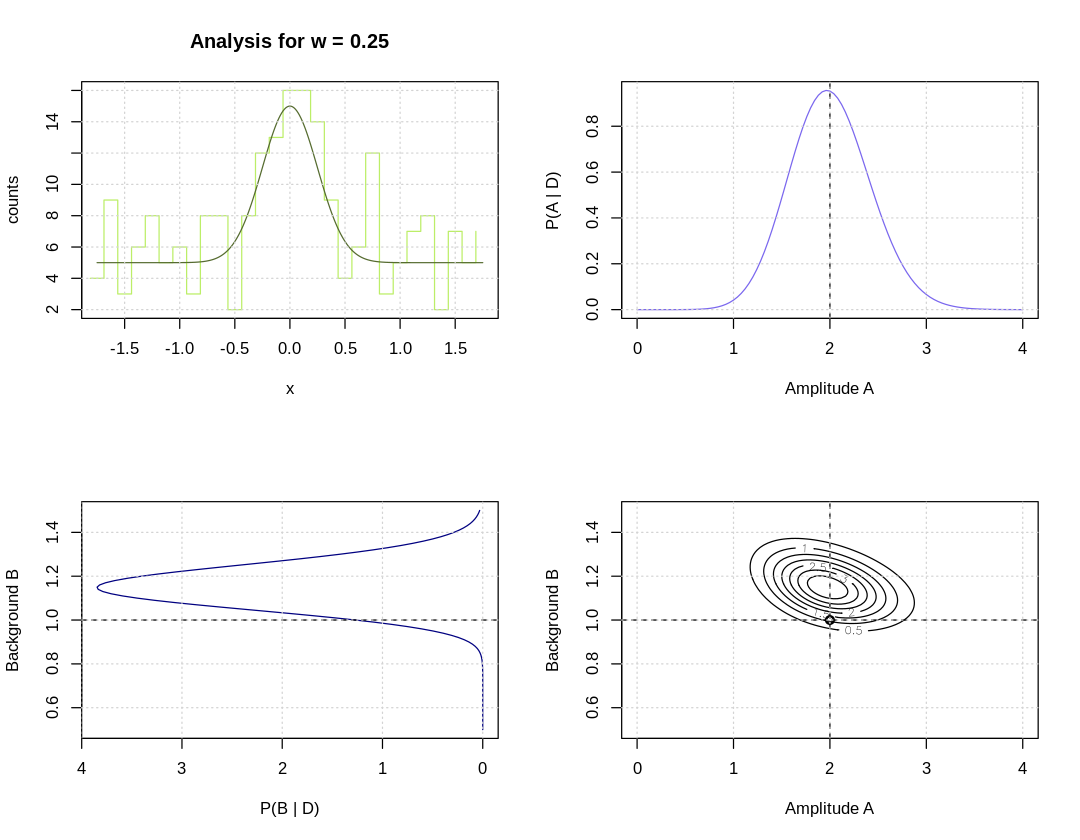

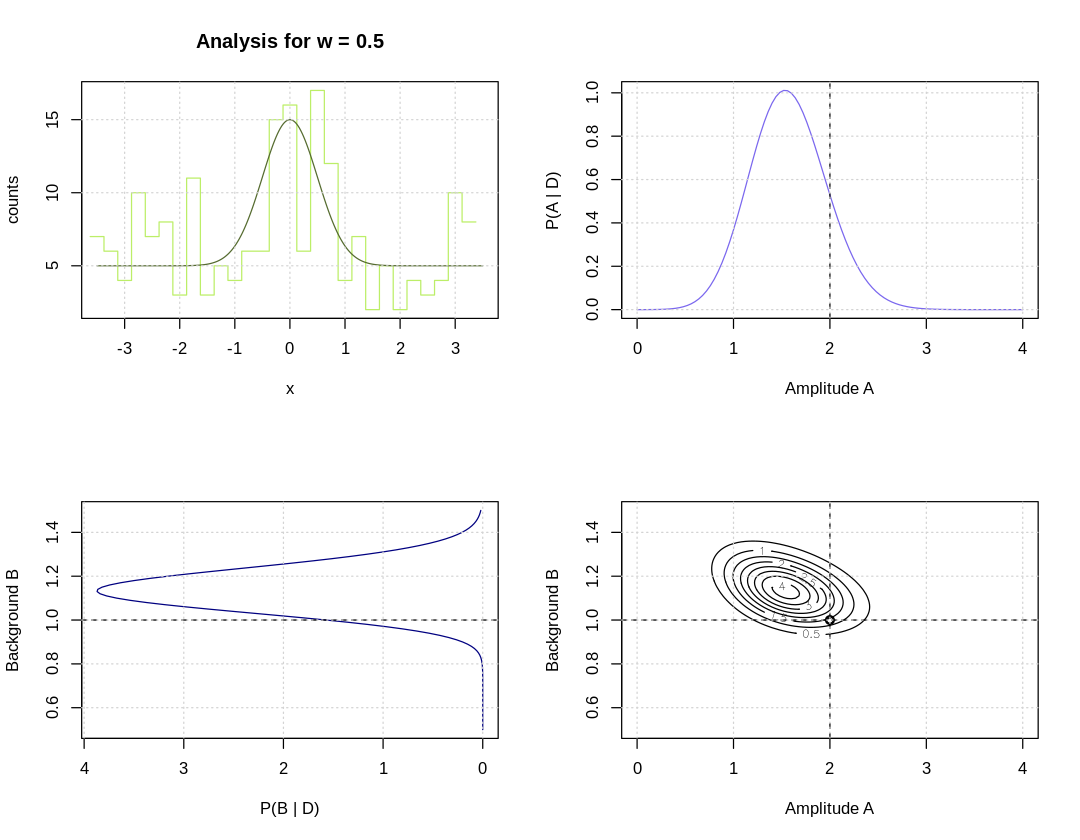

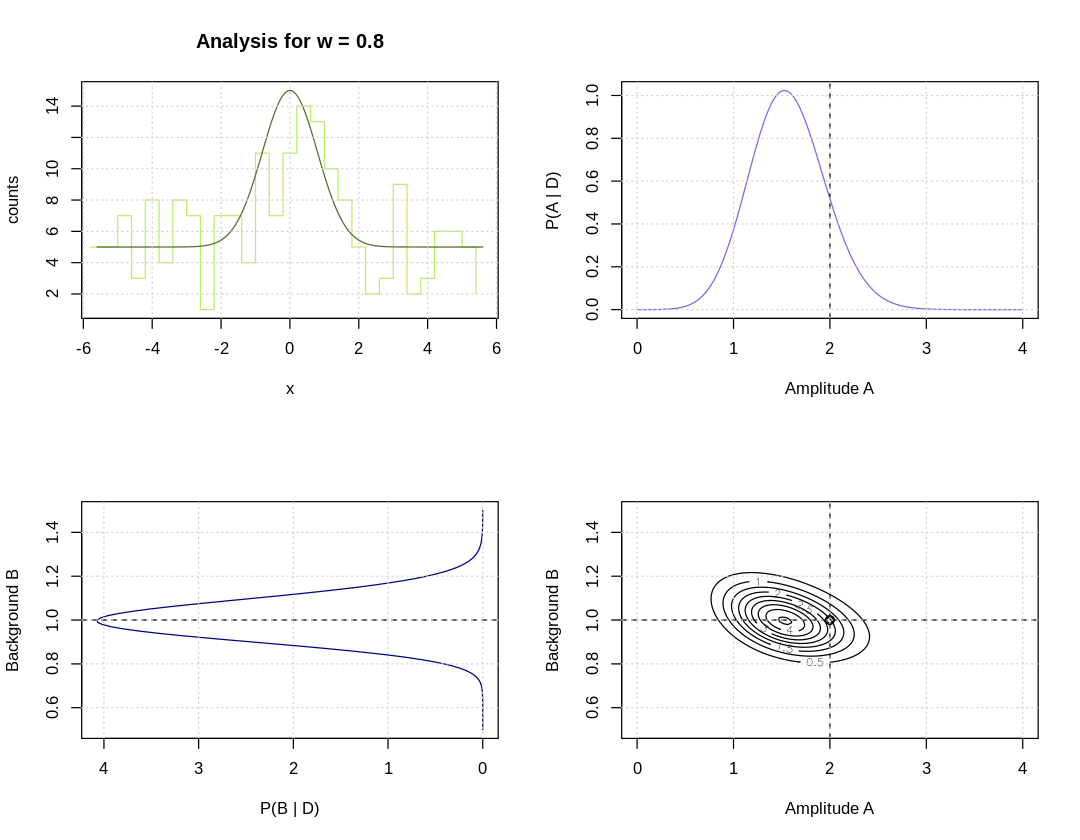

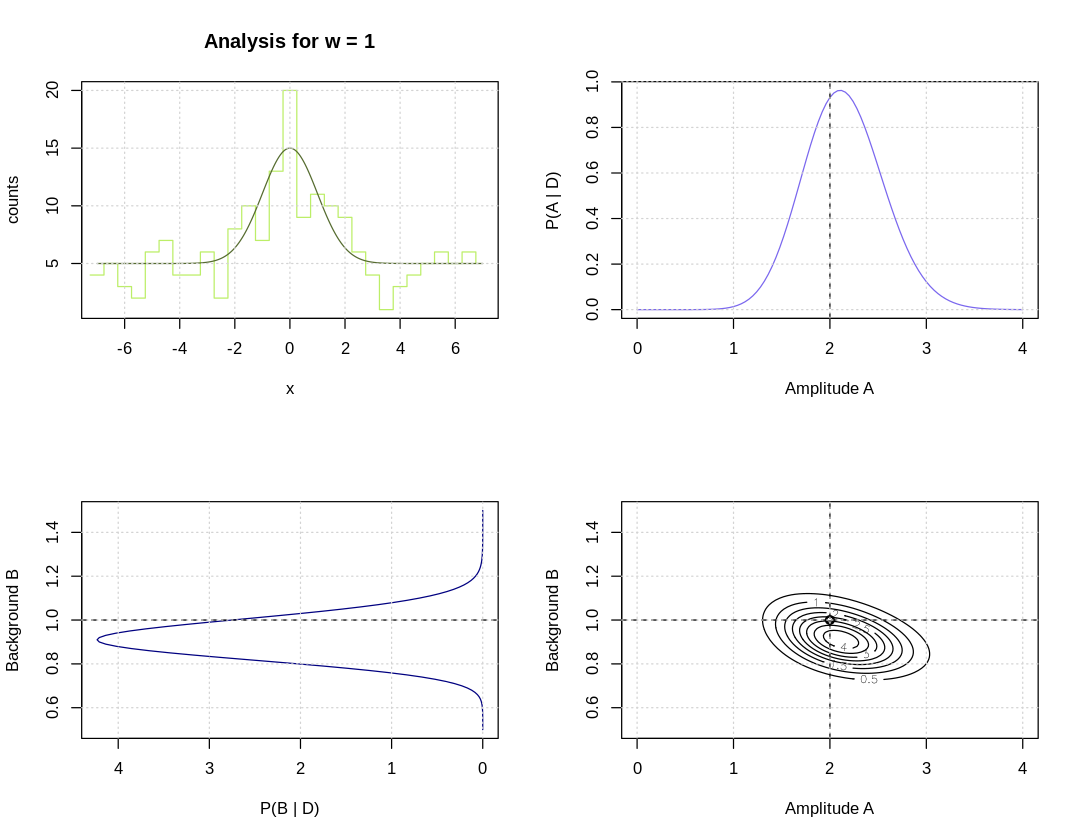

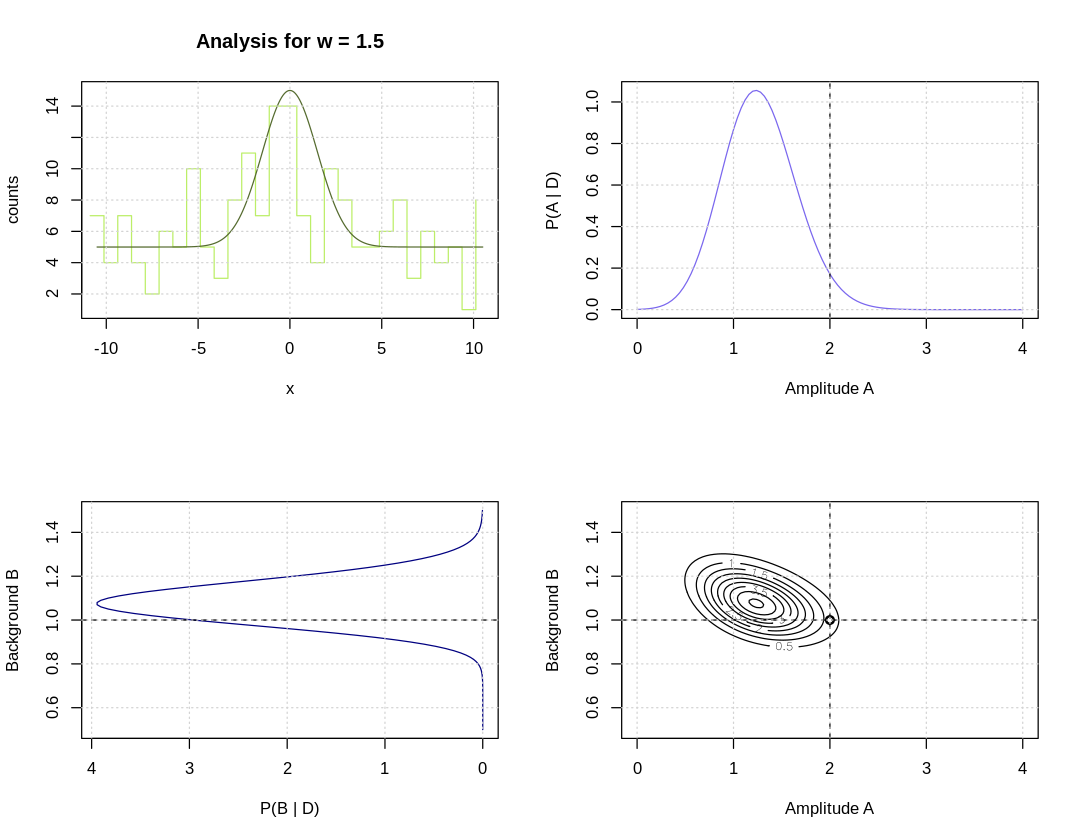

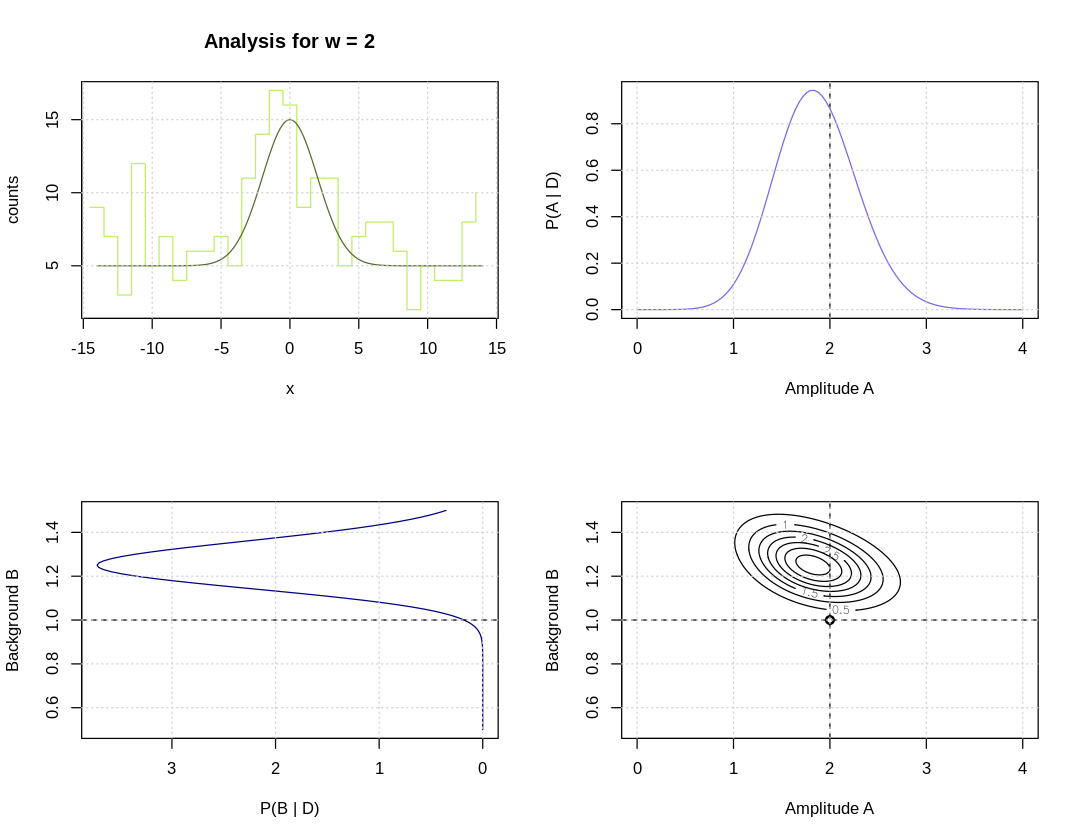

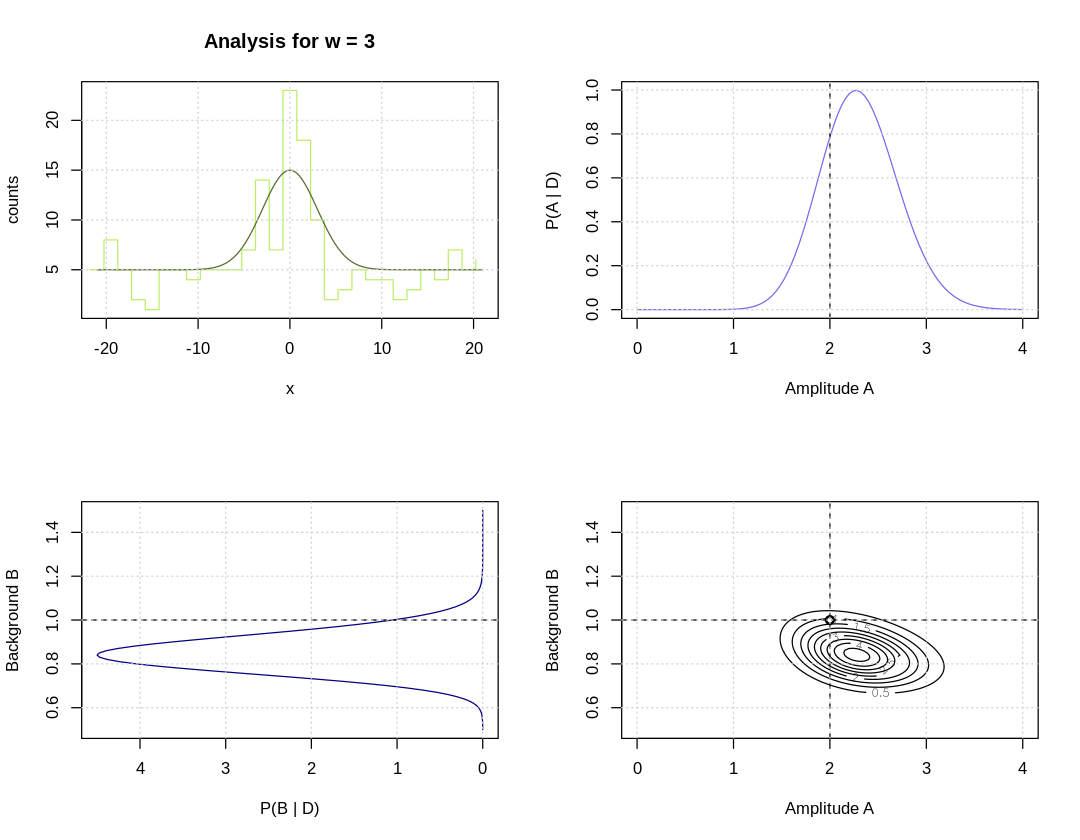

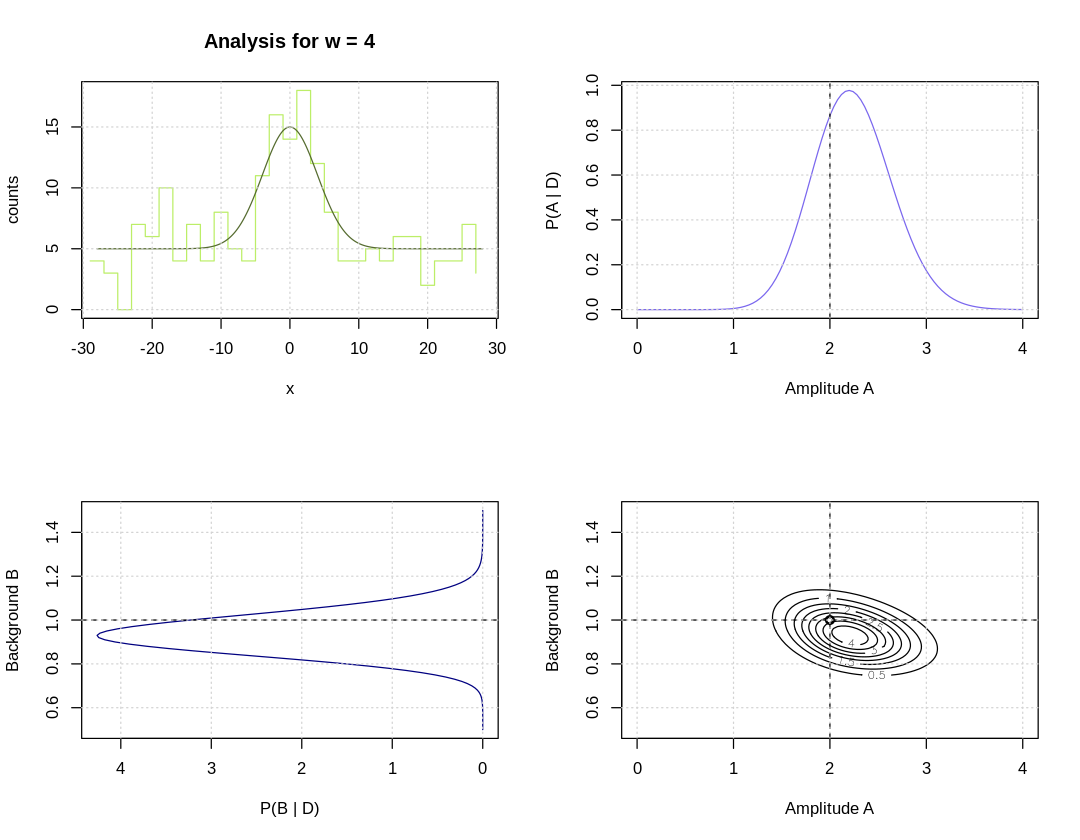

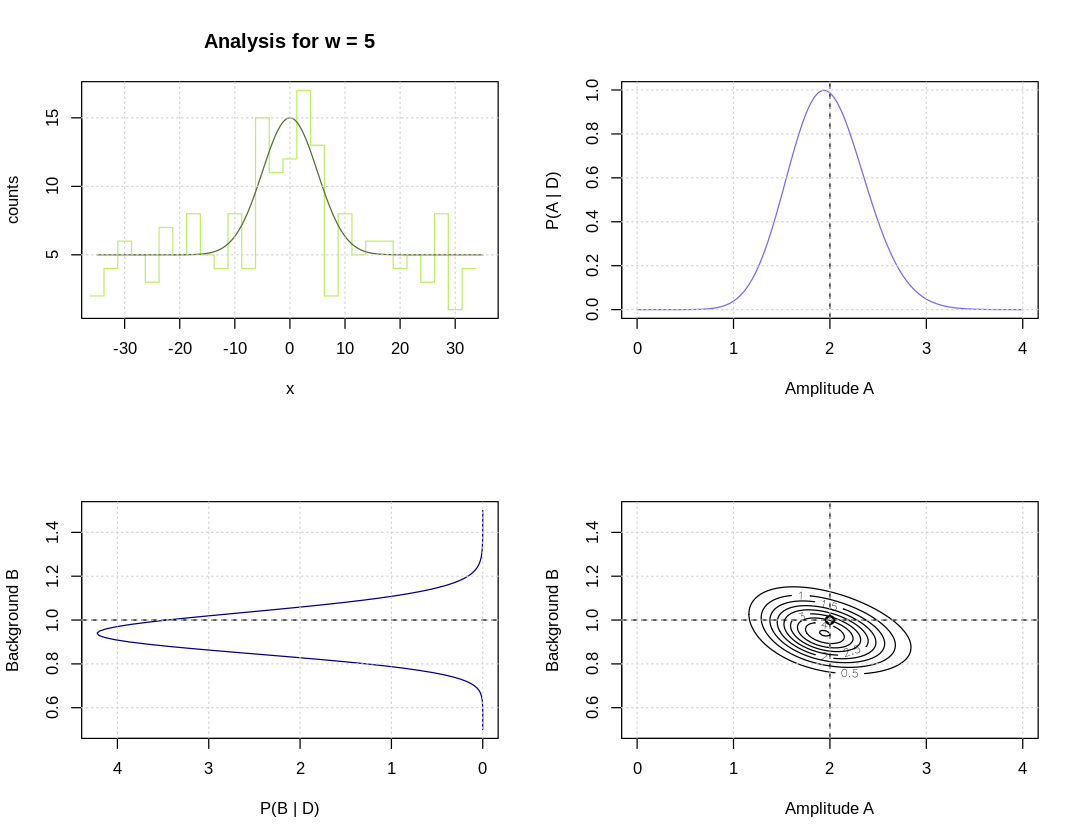

In [5]:
set.seed(5435334)

signal <- function(x, a, b, x0, w, t) {
    t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}

loglike <- function(p, d, x, x0, w, t){
    A <- p[1]
    B <- p[2]
    if(A <0 || B <0) { return (-Inf )} # the effect of the prior
    sum(dpois(d, lambda=signal(x, A, B, x0, w, t), log=TRUE))
} 

post_notnorm <- function(p, d, x, x0, w, t){
    exp(loglike(p, d, x, x0, w, t))
}


plot1 <- function(xdat, s.true, ddat, flag = TRUE){
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    xdat.off <- xdat - 0.25*w
    if (flag) { title <- paste('Analysis for w =', w)}
    else {title <- paste('Analysis for A/B =', A.true/B.true)}
    plot(xdat.off, ddat , type='s', col='darkolivegreen2', xlab="x", ylab = 'counts', main = title, xlim = range(xplot), ylim= range (c(splot, ddat)))
    lines(xplot, splot, col = 'darkolivegreen')
    grid()
}

x0 <- 0
A.true <- 2
B.true <- 1 
Delta.t <- 5
N <- 100

#ww <- c(0.1, 0.25, 1, 2, 3)
ww <- c(0.1, 0.25, 0.5, 0.8, 1, 1.5, 2, 3, 4, 5)

A.min <- 0
A.max <- 4
B.min <- 0.5
B.max <- 1.5
Delta.A <- (A.max - A.min)/N
Delta.B <- (B.max - B.min)/N

A.seq <- seq(A.min, A.max, length.out = N+1)
B.seq <- seq(B.min, B.max, length.out = N+1)
pairs <- expand.grid(A.seq, B.seq)


options(repr.plot.width = 9, repr.plot.height = 7)
par(mfrow = c(2, 2))

MN_a <- c()
MN_b <- c()
SD_a <- c()
SD_b <- c()
p_a_D_list <- c()
p_b_D_list <- c()

A_max_list <- c()
B_max_list <- c()

for (w in ww){
    
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    plot1(xdat, s.true, ddat, TRUE)

    norm <- adaptIntegrate(post_notnorm, lowerLimit = c(A.min, B.min), upperLimit = c(A.max, B.max), d = ddat, x = xdat, x0 = x0, w = w, t = Delta.t)$integral
    post <- apply(pairs, 1, post_notnorm, d = ddat, x = xdat, x0 = x0, w = w, t = Delta.t)/norm
    post_matrix <- matrix(post, nrow = length(A.seq))
    
    p_a_D <- apply(post_matrix, 1, sum)
    p_a_D <- p_a_D/(Delta.A * sum(p_a_D))
    p_a_D_list <- rbind(p_a_D_list, p_a_D)
    p_b_D <- apply(post_matrix, 2, sum)
    p_b_D <- p_b_D/(Delta.B*sum(p_b_D))
    p_b_D_list <- rbind(p_b_D_list, p_b_D)
    
    mean_a <- Delta.A * sum(A.seq * p_a_D)
    MN_a <- c(MN_a, mean_a)
    mean_b <- Delta.B * sum(B.seq * p_b_D)
    MN_b <- c(MN_b, mean_b)
    sd_a <- sqrt(Delta.A * sum((A.seq - mean_a)^2 * p_a_D))
    SD_a <- c(SD_a, sd_a)
    sd_b <- sqrt(Delta.B * sum((B.seq - mean_b)^2 * p_b_D))
    SD_b <- c(SD_b, sd_b)
    
    idx <- which(post_matrix == max(post_matrix), arr.ind = TRUE)
    
    A_max_list <- c(A_max_list, A.seq[idx[1]])
    B_max_list <- c(B_max_list, B.seq[idx[2]])
    
    plot(A.seq, p_a_D, xlab= 'Amplitude A', ylab = 'P(A | D)', type="l", col = 'slateblue2')
    abline(v = A.true, lty = 2)
    grid()
    plot(p_b_D, B.seq, ylab= 'Background B', xlim = rev(range(p_b_D)), xlab = 'P(B | D)', type='l', col = 'navy')
    abline(h = B.true, lty = 2)
    grid()
    
    contour(A.seq, B.seq, post_matrix, xlab = 'Amplitude A', ylab = 'Background B') 
    points(A.true, B.true, pch = 1, lwd = 2) 
    abline(v= A.true, h = B.true, lty = 2)
    grid()
}

It can be seen that when the resolution is very small the signal is more peaked around 0, whereas when it increases the signal becomes more spread (the binning and the x range are variable: when w=0.1 the range is $[-0.8, .8]$ and when w=5 it is $[-40, 40]$).

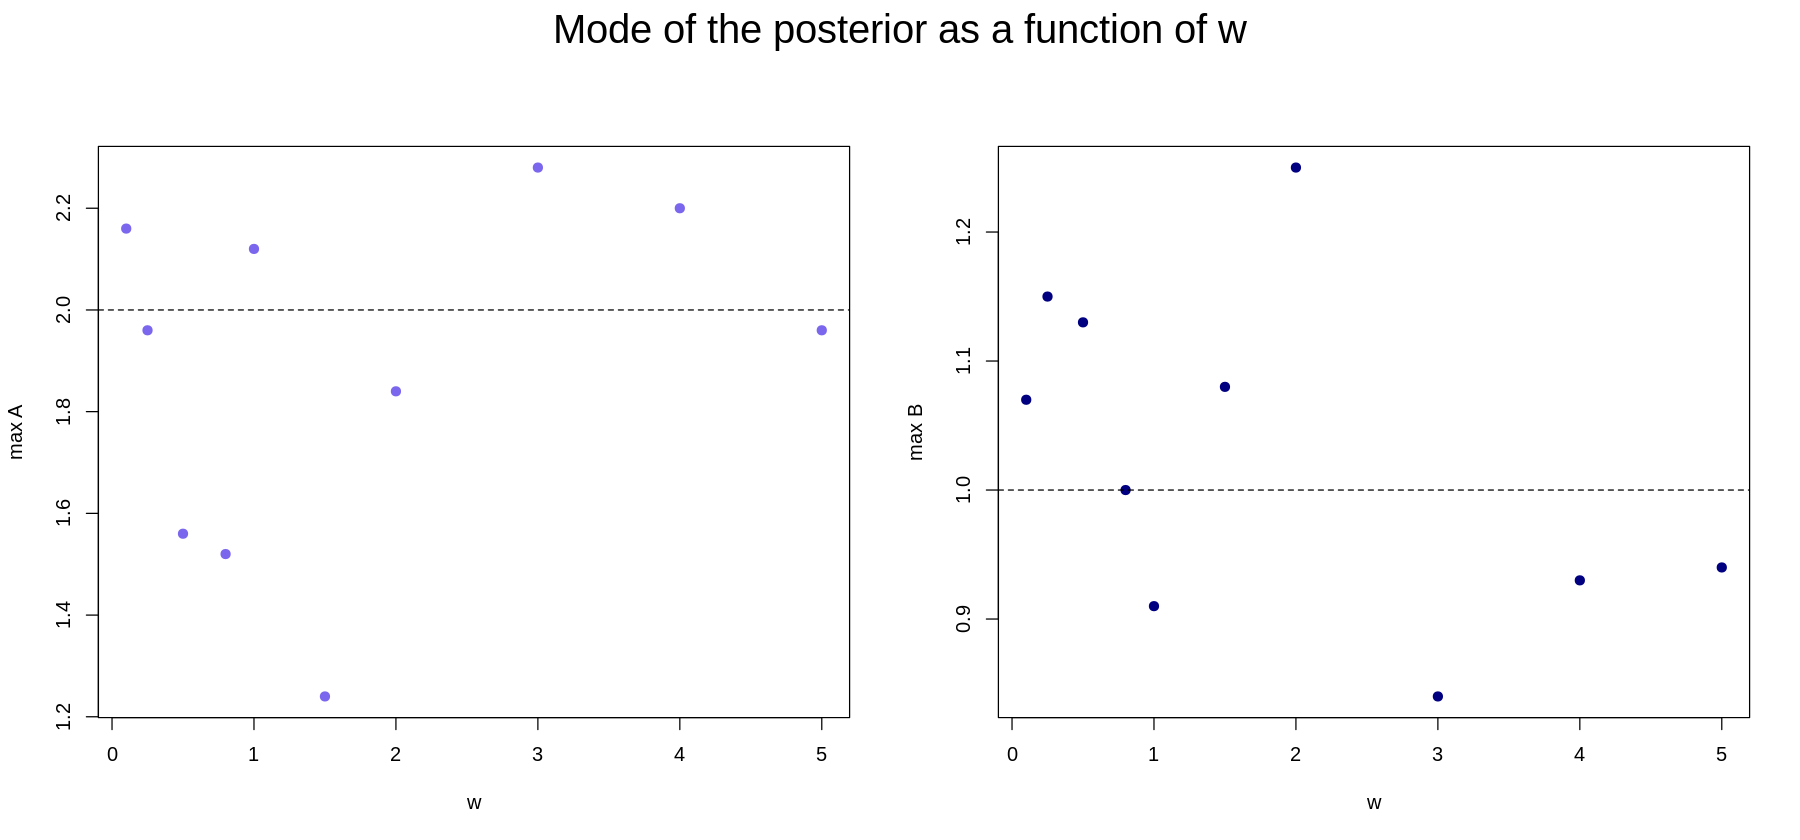

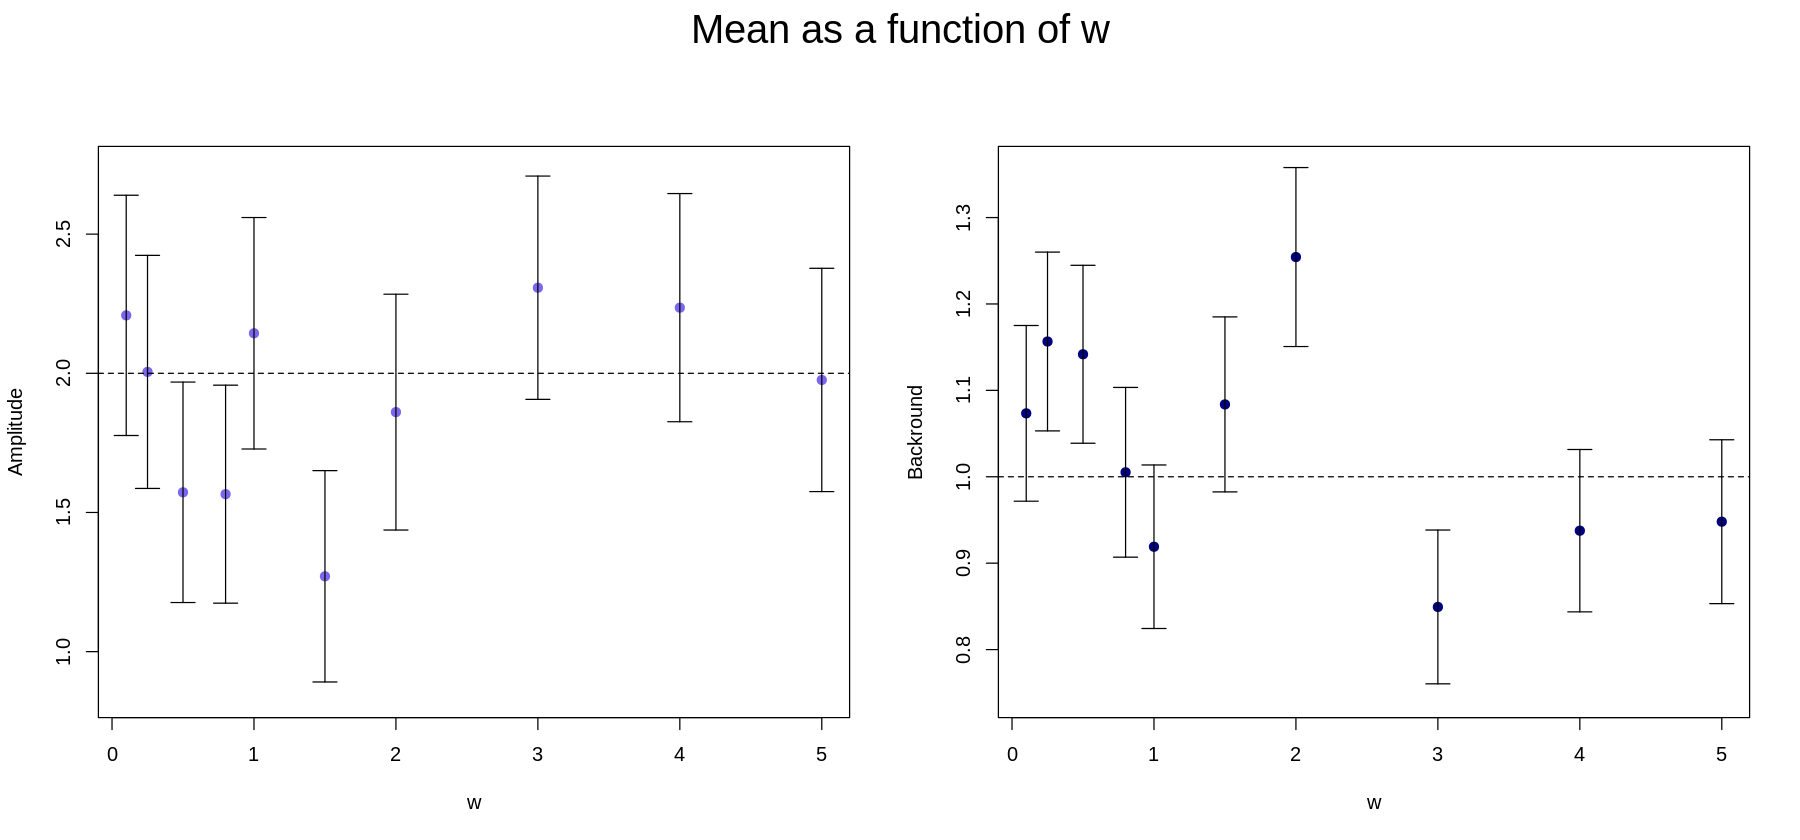

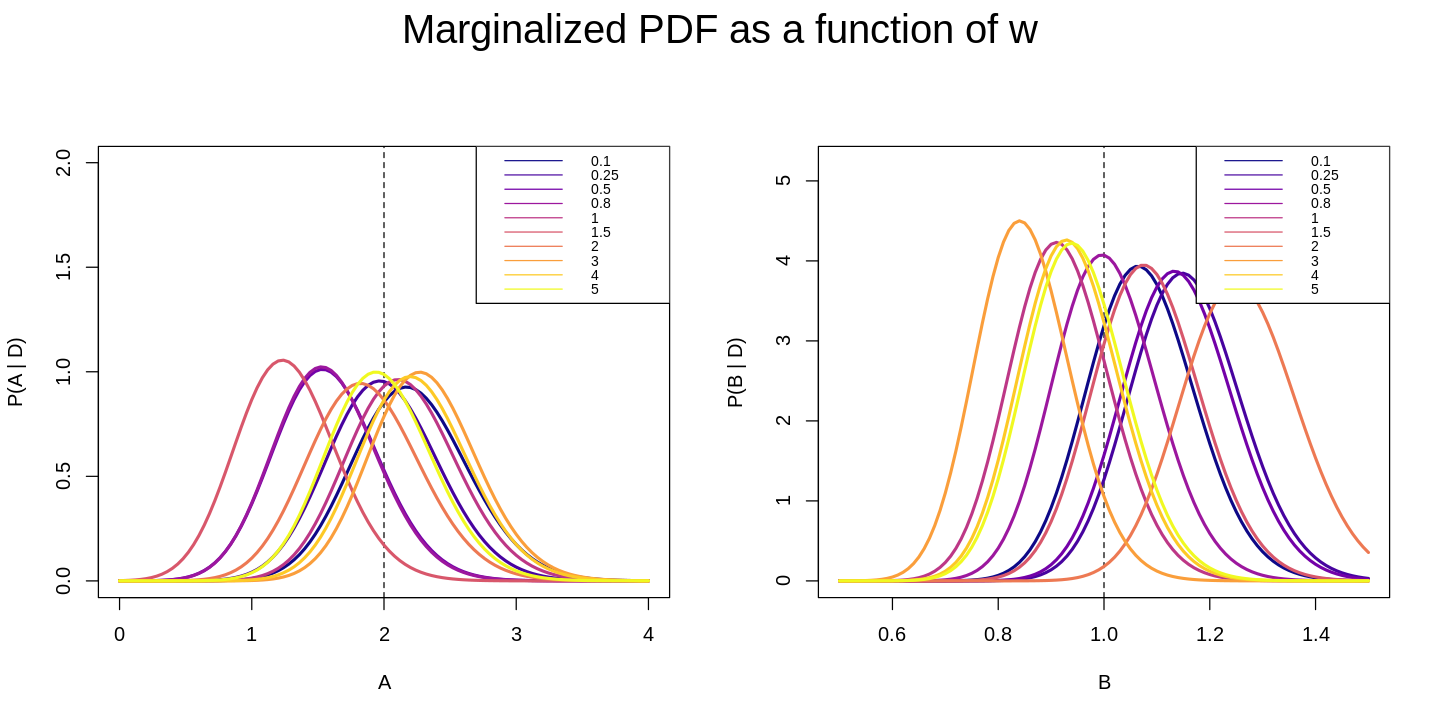

In [6]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1, 2), oma = c(0, 0, 2, 0))

plot(ww, A_max_list, pch = 20, cex = 1.5, col ='slateblue2', xlab = 'w', ylab = 'max A')
abline(h = A.true, col = 'black', lty  = 2)

plot(ww, B_max_list, pch = 20, cex = 1.5, col = 'navy', xlab = 'w', ylab = 'max B')
abline(h = B.true, col = 'black', lty  = 2)
mtext('Mode of the posterior as a function of w', outer = TRUE, cex = 2)


##############################################################################################################
plot(ww, MN_a, pch = 20, cex = 1.5, col ='slateblue2', xlab = 'w', ylab = 'Amplitude', ylim = c(min(MN_a)-max(SD_a),max(MN_a)+max(SD_a)))
arrows(ww, MN_a - SD_a, ww, MN_a + SD_a, angle = 90, code = 3, length = .1)
abline(h = A.true, col = 'black', lty  = 2)

plot(ww, MN_b, pch = 20, cex = 1.5, col = 'navy', xlab = 'w', ylab = 'Backround', ylim = c(min(MN_b)-max(SD_b),max(MN_b)+max(SD_b)))
arrows(x0 = ww, y0 = MN_b - SD_b, x1 = ww, y1 = MN_b + SD_b, angle = 90, code = 3, length = .1)
abline(h = B.true, col = 'black', lty  = 2)
mtext('Mean as a function of w', outer = TRUE, cex = 2)

#######################################################################################################################

#Plot marginalized posteriors
colors <- plasma(length(ww))

options(repr.plot.width=12, repr.plot.height=6)

ylim = c(0, max(p_a_D)+1)
par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(A.seq, p_a_D_list[1,], xlab= 'A', ylab = 'P(A | D)', type='l', lwd=2.5, col = colors[1], ylim = ylim)
abline(v = A.true, lty = 2)
for (n in 2:length(ww)){
    par(new=TRUE)   
    plot(A.seq, p_a_D_list[n,], xlab= '', ylab = '', type='l', lwd=2.5, col = colors[n], ylim = ylim, axes = FALSE, ann = FALSE)
}
legend('topright', legend = ww, col = colors, lty = 1, cex=0.7)

ylim = c(0, max(p_b_D)+1)
plot(B.seq, p_b_D_list[1,], xlab= 'B', ylab = 'P(B | D)', type='l', lwd=2.5, col = colors[1], ylim = ylim)
abline(v = B.true, lty = 2)
for (n in 2:length(ww)){
    par(new=TRUE)   
    plot(B.seq, p_b_D_list[n,], xlab= '', ylab = '', type='l', lwd=2.5, col = colors[n], ylim = ylim, axes = FALSE, ann = FALSE)
}
legend('topright', legend = ww, col = colors, lty = 1, cex=0.7)

mtext('Marginalized PDF as a function of w', outer = TRUE, cex = 2)

The plots show how the mode, mean, and marginalized posterior vary increasing the value of w.

We cannot recognize a clear dependence on w, and we observe that the mean of the marginalized posterior in the beginning is not always compatible with the true value, but we cannot recognize a pattern.


#### 3.2) Change the ratio used to simulate the data (keeping both positive in accordance with the prior) and check the effect on the results.


I chose to keep constant the amplitude of the background and change the amplitude of the signal.


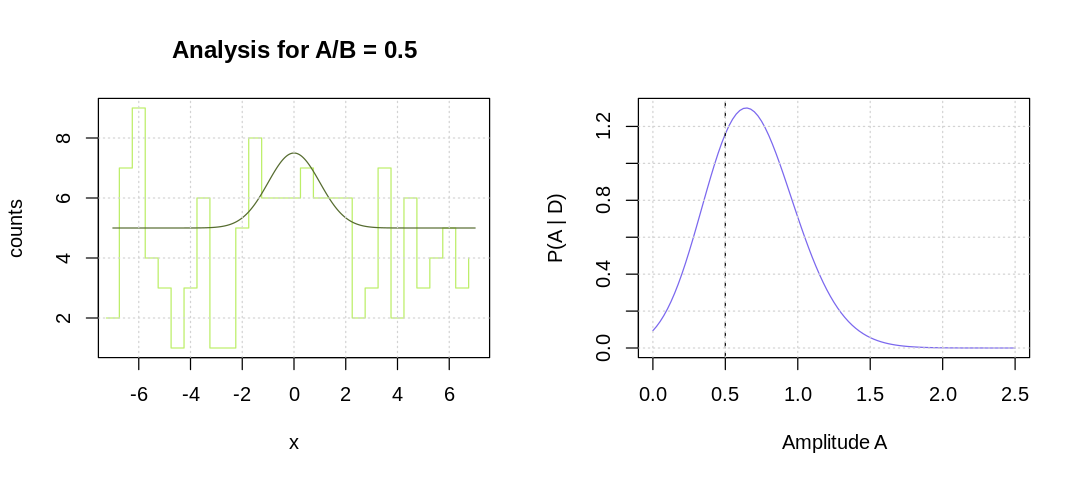

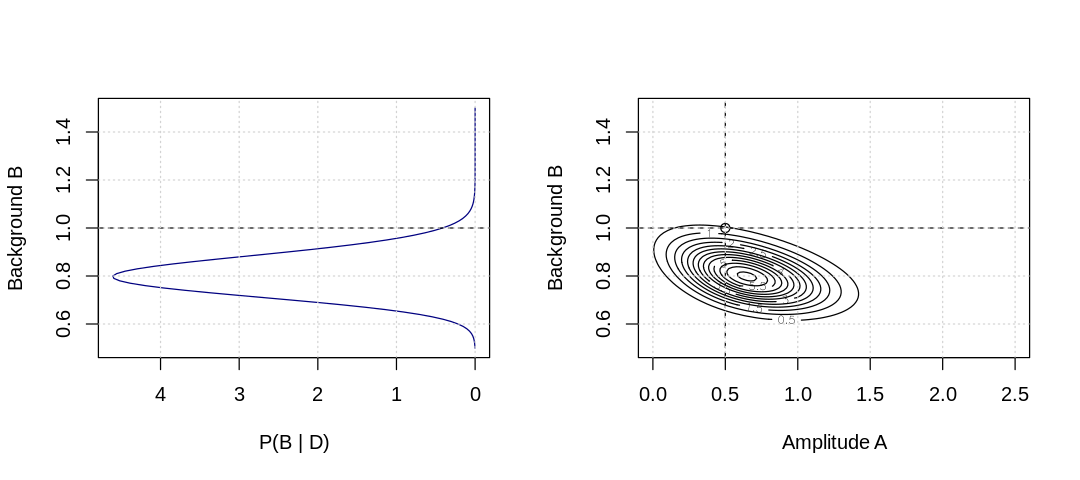

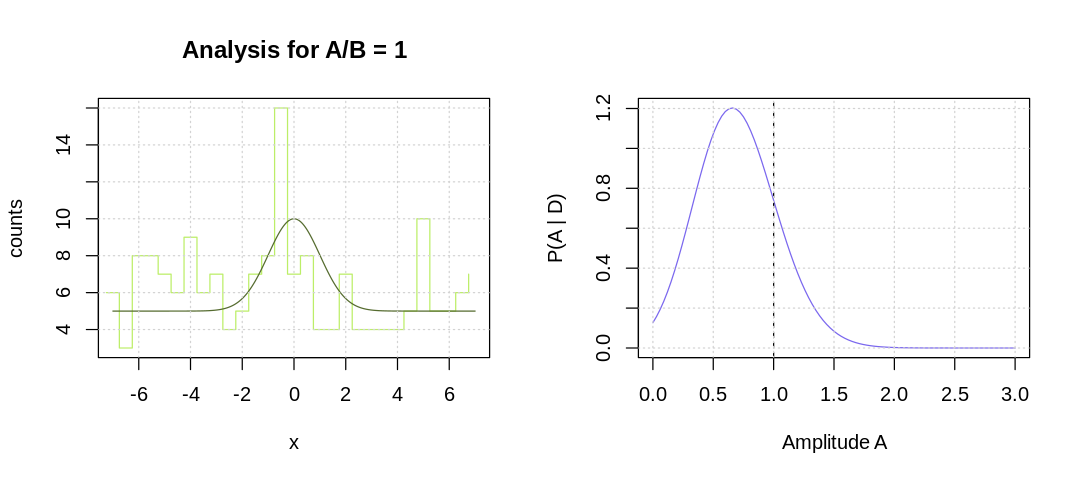

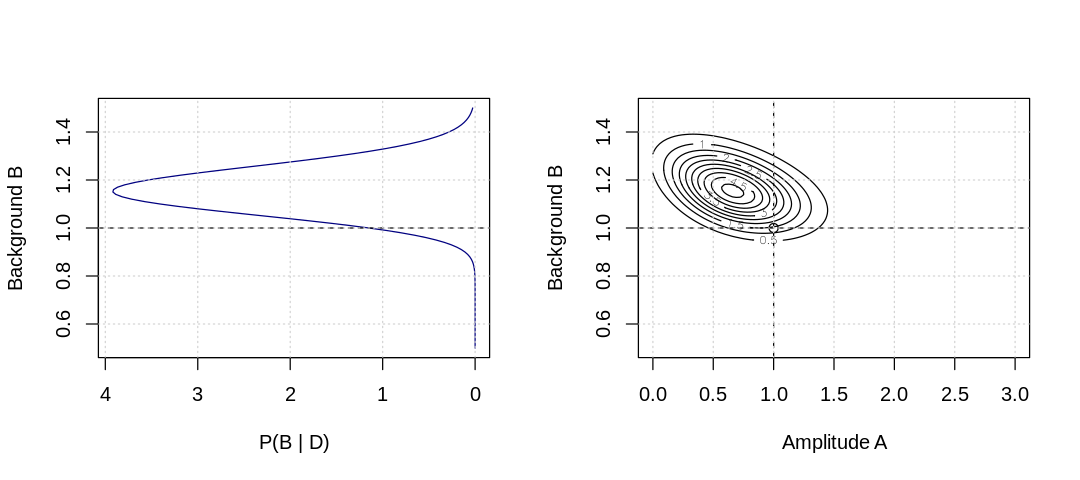

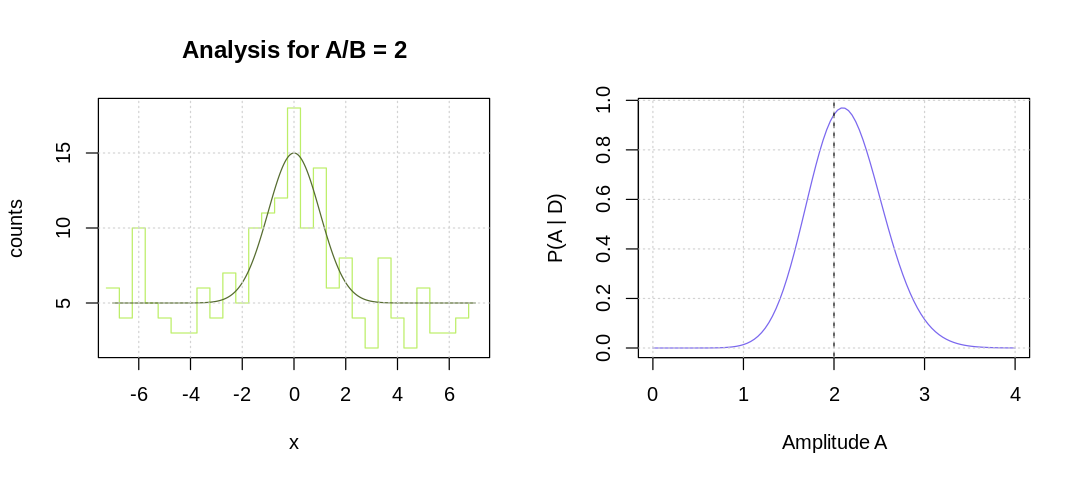

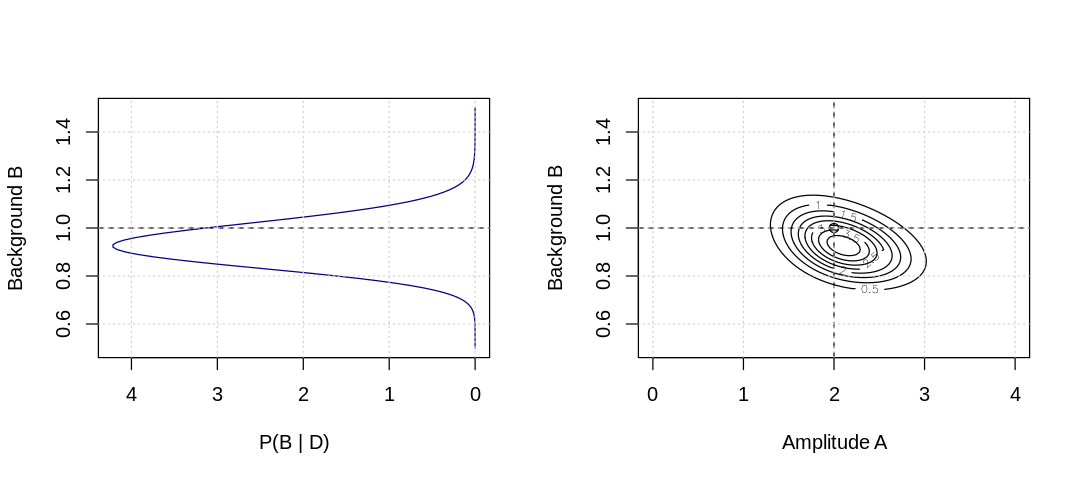

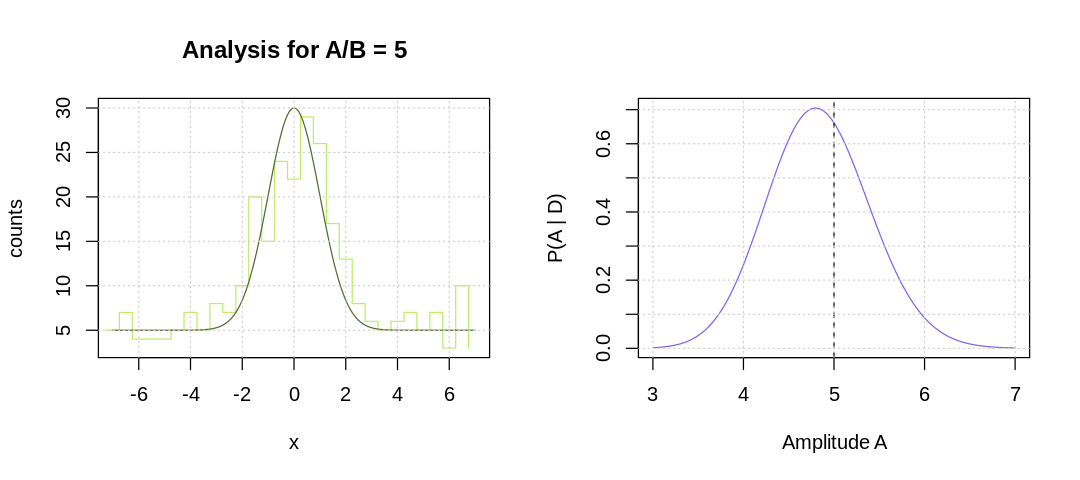

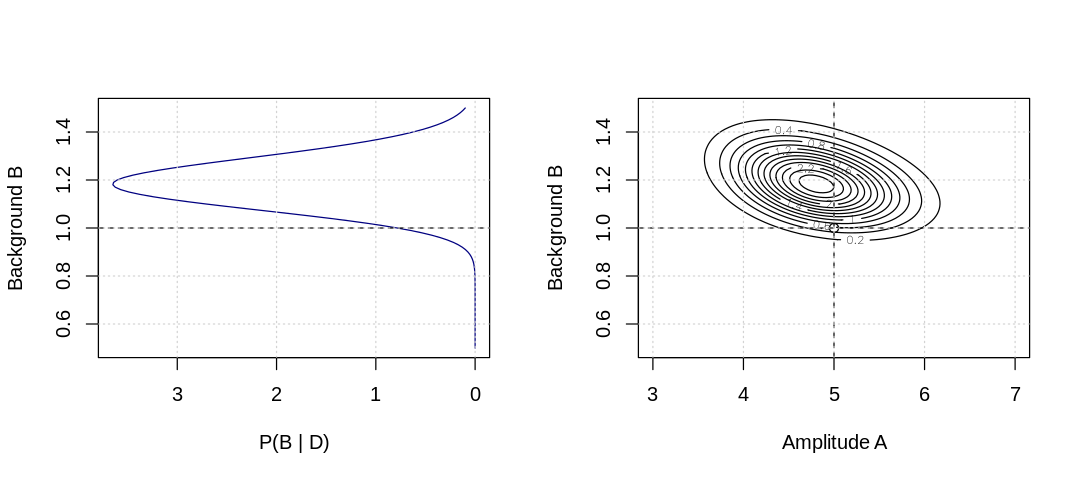

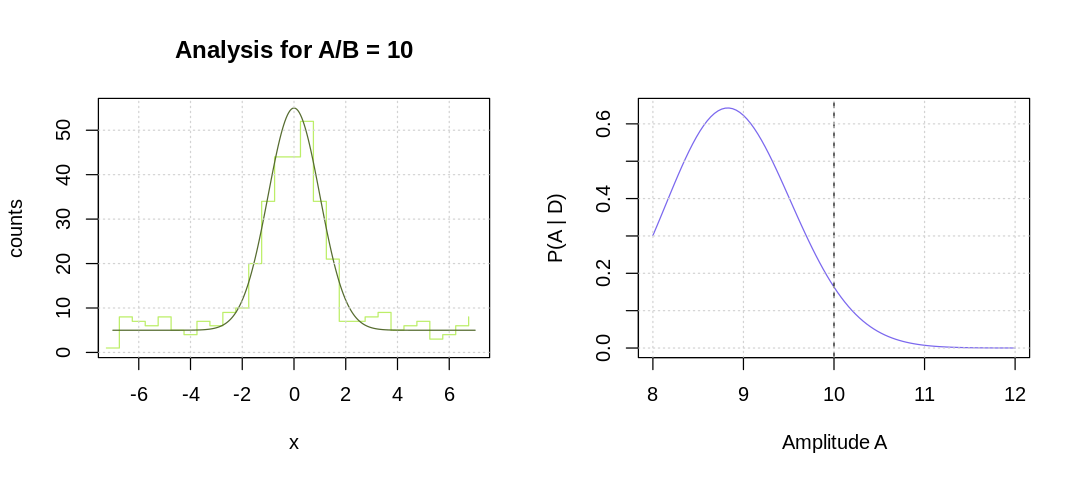

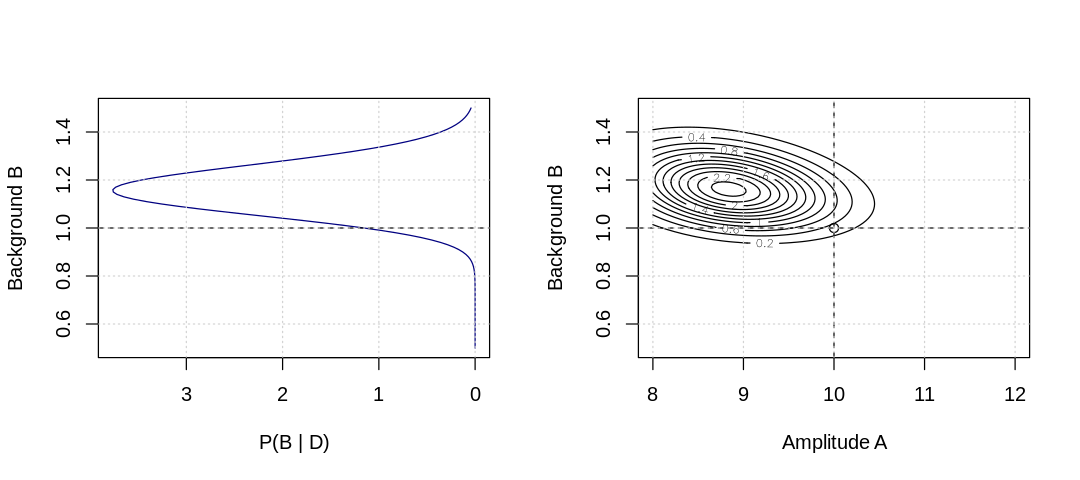

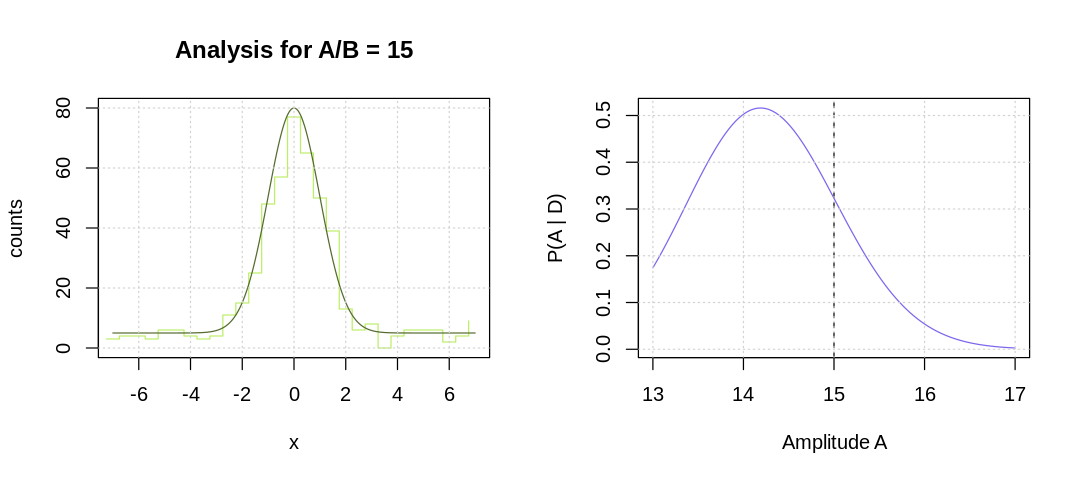

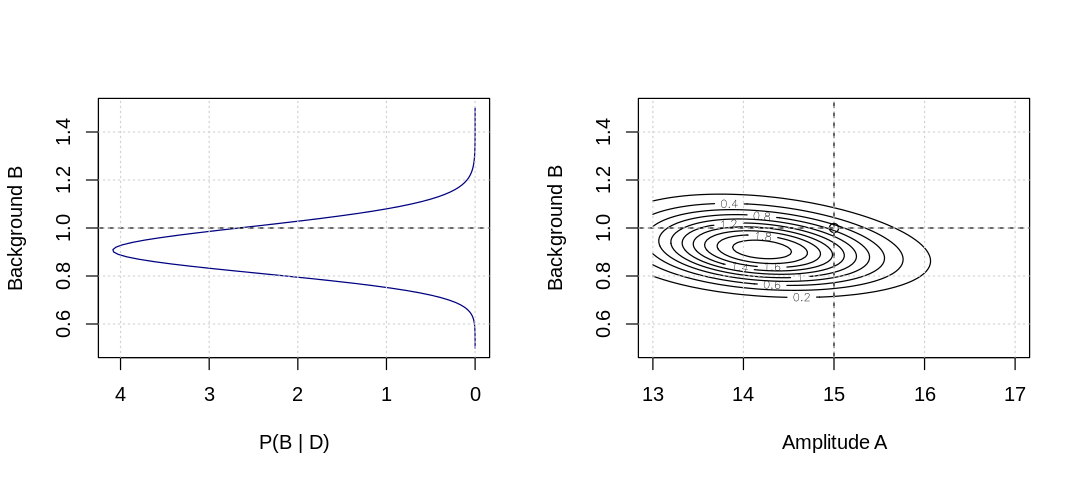

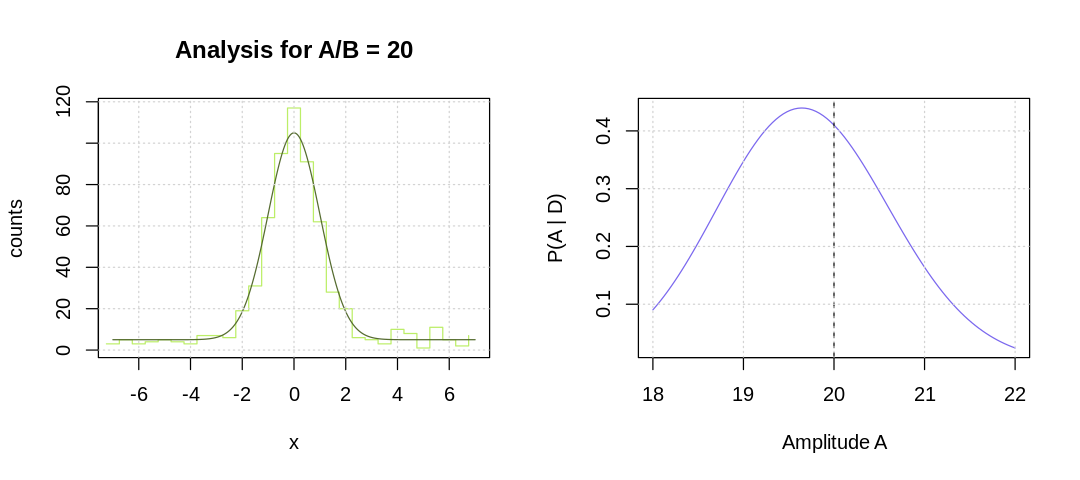

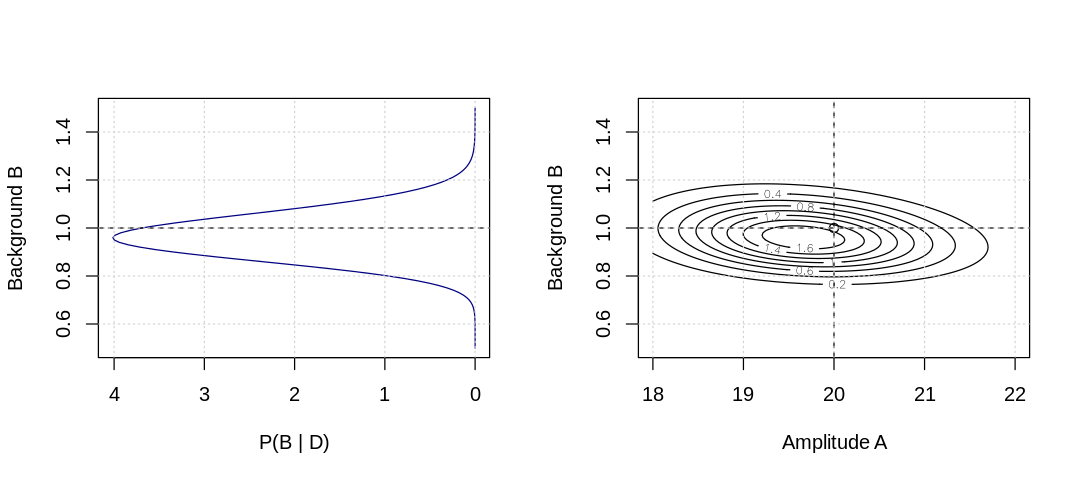

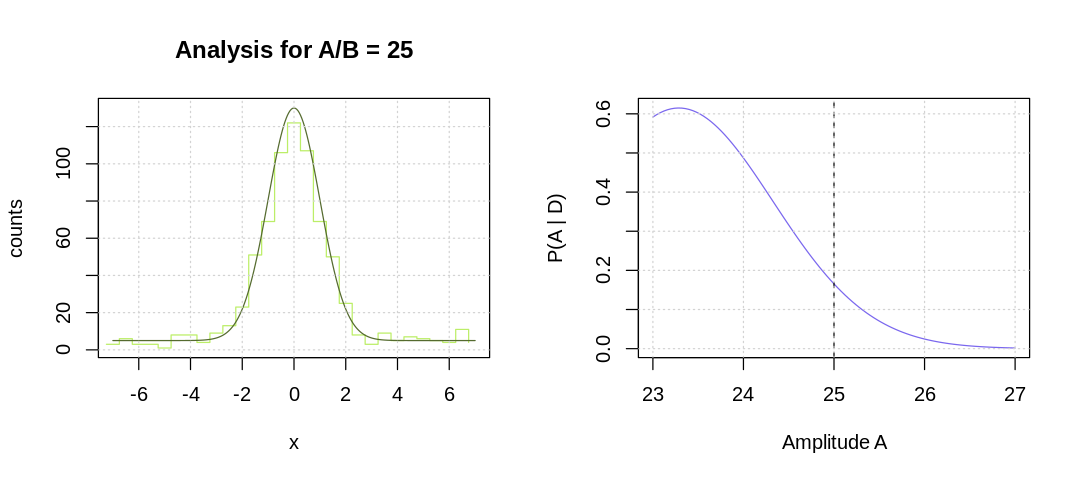

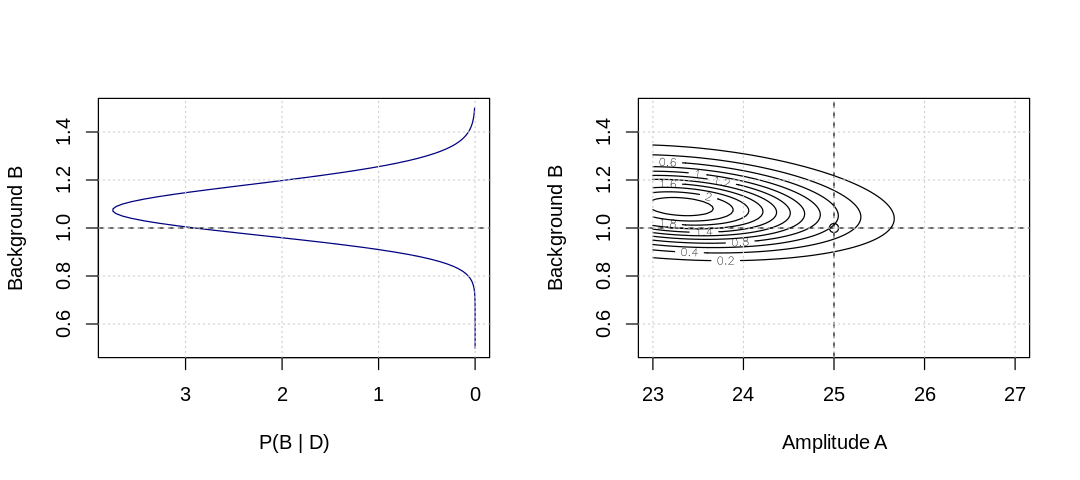

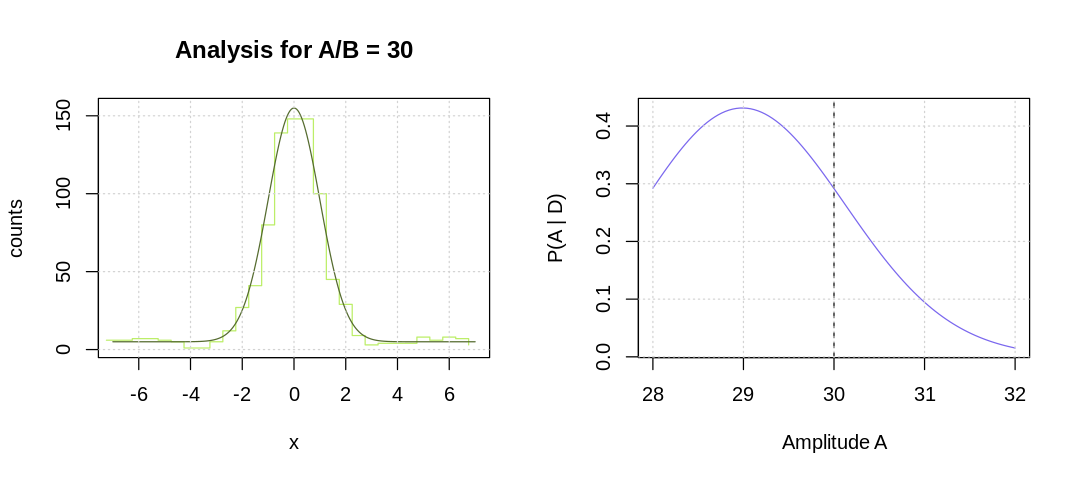

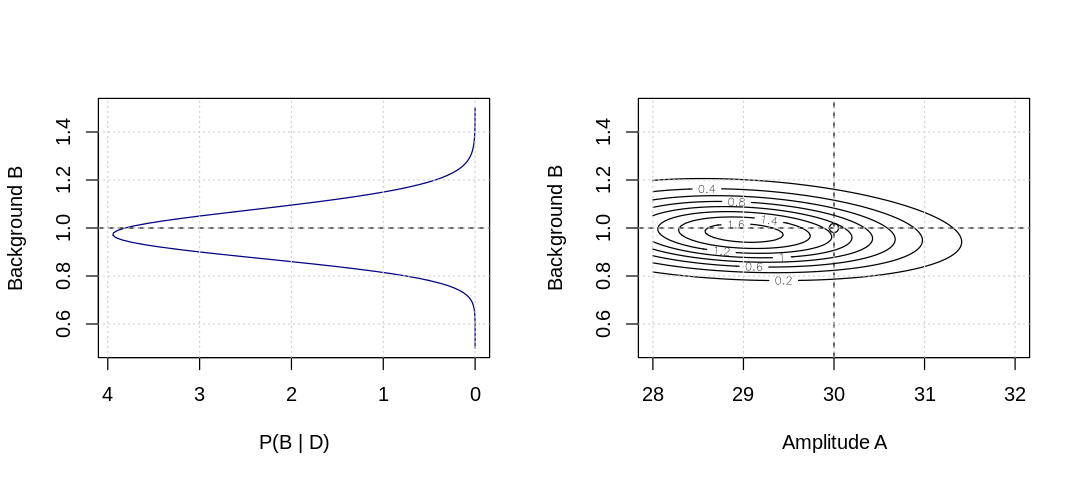

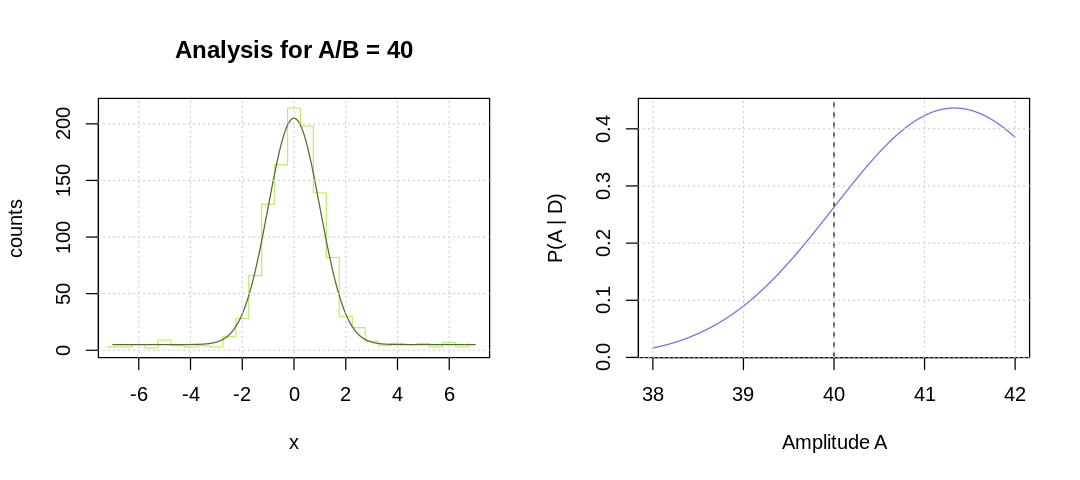

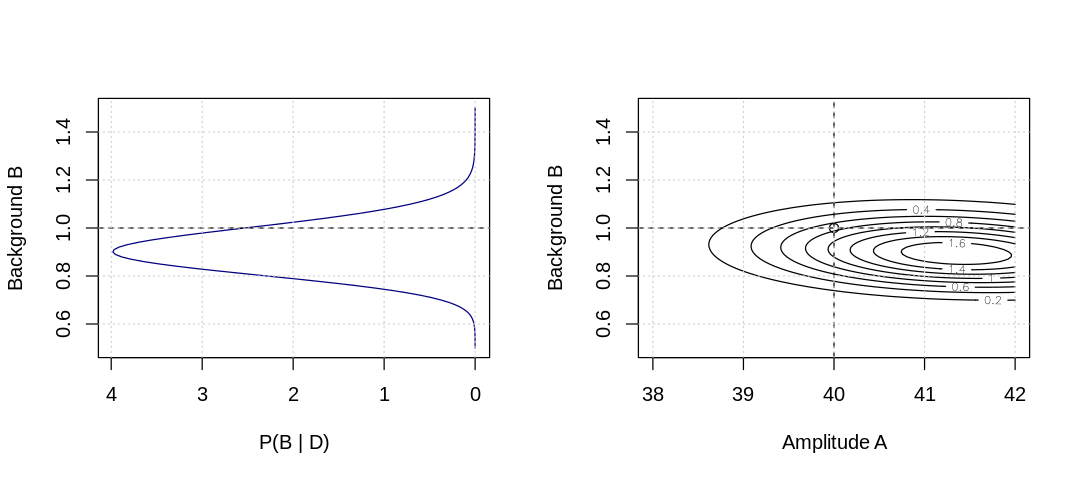

In [7]:
#set.seed(44863)
set.seed(12)
options(repr.plot.width = 9, repr.plot.height = 4)
par(mfrow = c(1, 2))


B.min <- 0.5
B.max <- 1.5
Delta.t <- 5
Delta.B <- (B.max - B.min)/N
B.seq <- seq(B.min, B.max, length.out = N+1)

B.true <- 1
A.trues <- c(0.5, 1, 2, 5, 10, 15, 20, 25, 30, 40)
#A.trues <- c(1, 2, 3, 5, 10)
w <- 1

MN_a <- c()
MN_b <- c()
SD_a <- c()
SD_b <- c()
p_a_D_list <- c()
p_b_D_list <- c()
A_max_list <- c()
B_max_list <- c()

for (A.true in A.trues)
{
    A.min <- A.true - 2
    if (A.min < 0) {A.min <- 0}
    A.max <- A.true + 2
    Delta.A <- (A.max - A.min)/N
    A.seq <- seq(A.min, A.max, length.out = N+1)
    pairs <- expand.grid(A.seq, B.seq)
    
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true, x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    plot1(xdat, s.true, ddat, FALSE)

    norm <- adaptIntegrate(post_notnorm, lowerLimit = c(A.min, B.min), upperLimit = c(A.max, B.max), d = ddat, x = xdat, x0 = x0, w = w, t = Delta.t)$integral
    post <- apply(pairs, 1, post_notnorm, d = ddat, x = xdat, x0 = x0, w = w, t = Delta.t)/norm
    post_matrix <- matrix(post, nrow = length(A.seq))
    
    p_a_D <- apply(post_matrix, 1, sum)
    p_a_D <- p_a_D/(Delta.A * sum(p_a_D))
    p_a_D_list <- rbind(p_a_D_list, p_a_D)
    p_b_D <- apply(post_matrix, 2, sum)
    p_b_D <- p_b_D/(Delta.B*sum(p_b_D))
    p_b_D_list <- rbind(p_b_D_list, p_b_D)
    
    mean_a <- Delta.A * sum(A.seq * p_a_D)
    MN_a <- c(MN_a, mean_a)
    mean_b <- Delta.B * sum(B.seq * p_b_D)
    MN_b <- c(MN_b, mean_b)
    sd_a <- sqrt(Delta.A * sum((A.seq - mean_a)^2 * p_a_D))
    SD_a <- c(SD_a, sd_a)
    sd_b <- sqrt(Delta.B * sum((B.seq - mean_b)^2 * p_b_D))
    SD_b <- c(SD_b, sd_b)
    
    idx <- which(post_matrix == max(post_matrix), arr.ind = TRUE)
    
    A_max_list <- c(A_max_list, A.seq[idx[1]])
    B_max_list <- c(B_max_list, B.seq[idx[2]])
    
    plot(A.seq, p_a_D, xlab= 'Amplitude A', ylab = 'P(A | D)', type='l', col = 'slateblue2', xlim = c(A.min, A.max))
    abline(v = A.true, lty = 2)
    grid()
    plot(p_b_D, B.seq, ylab= 'Background B', xlim = rev(range(p_b_D)), xlab = 'P(B | D)', type='l', col = 'navy', ylim = c(B.min, B.max))
    abline(h = B.true, lty = 2)
    grid()
    
    contour(A.seq, B.seq, post_matrix, xlab = 'Amplitude A', ylab = 'Background B') 
    points(A.true, B.true, pch = 1) 
    abline(v= A.true, h = B.true, lty = 2)
    grid()
}

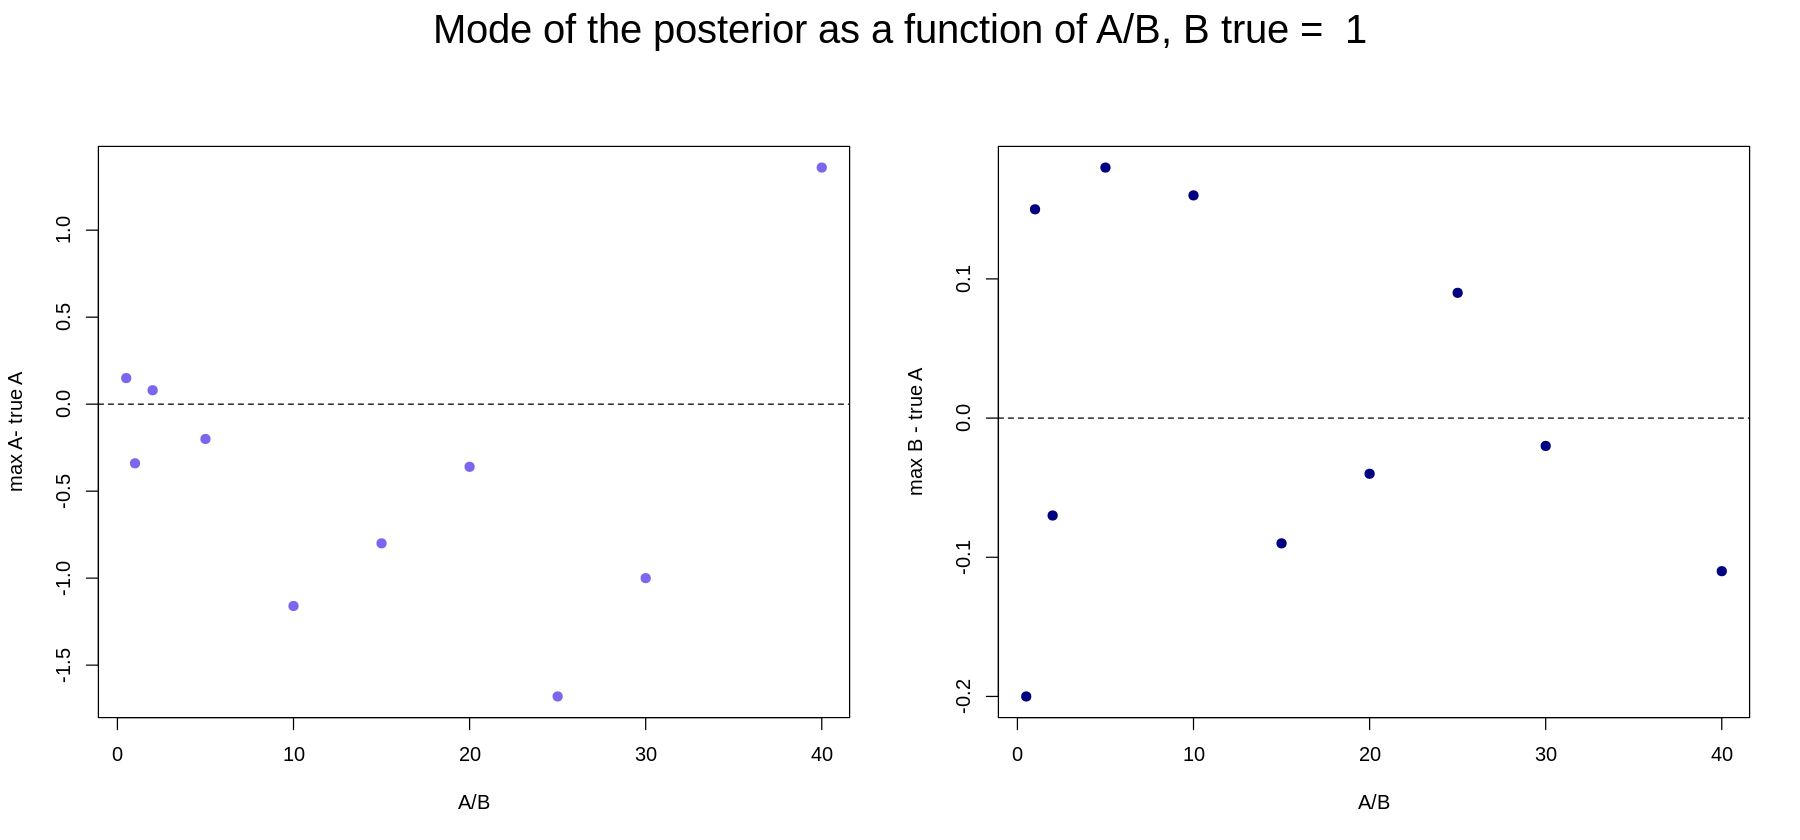

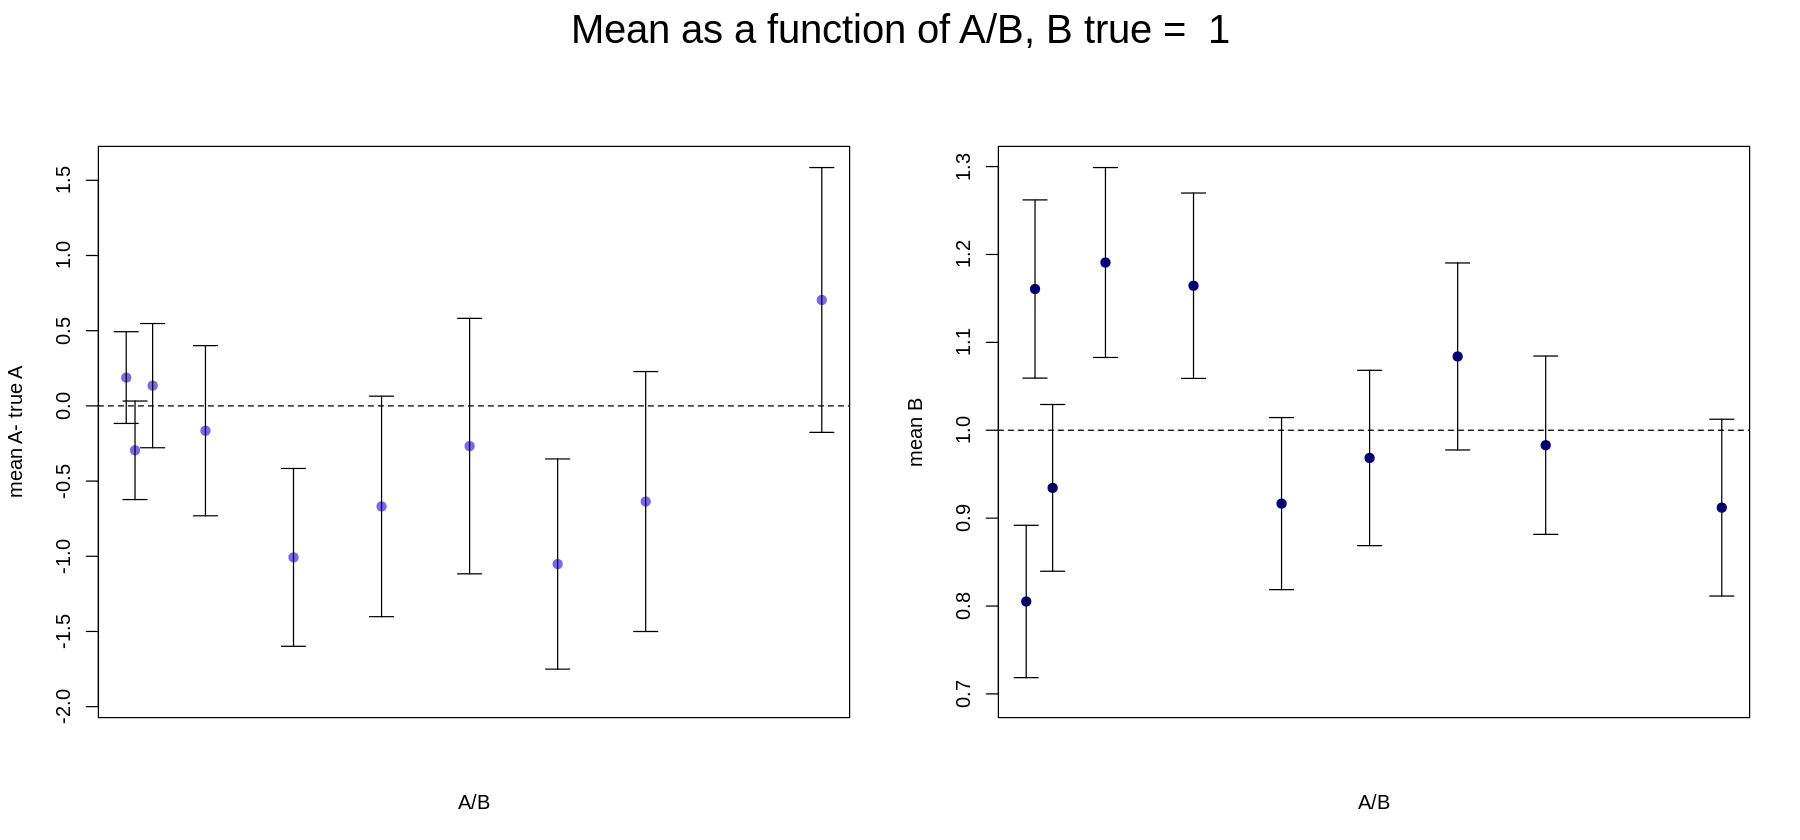

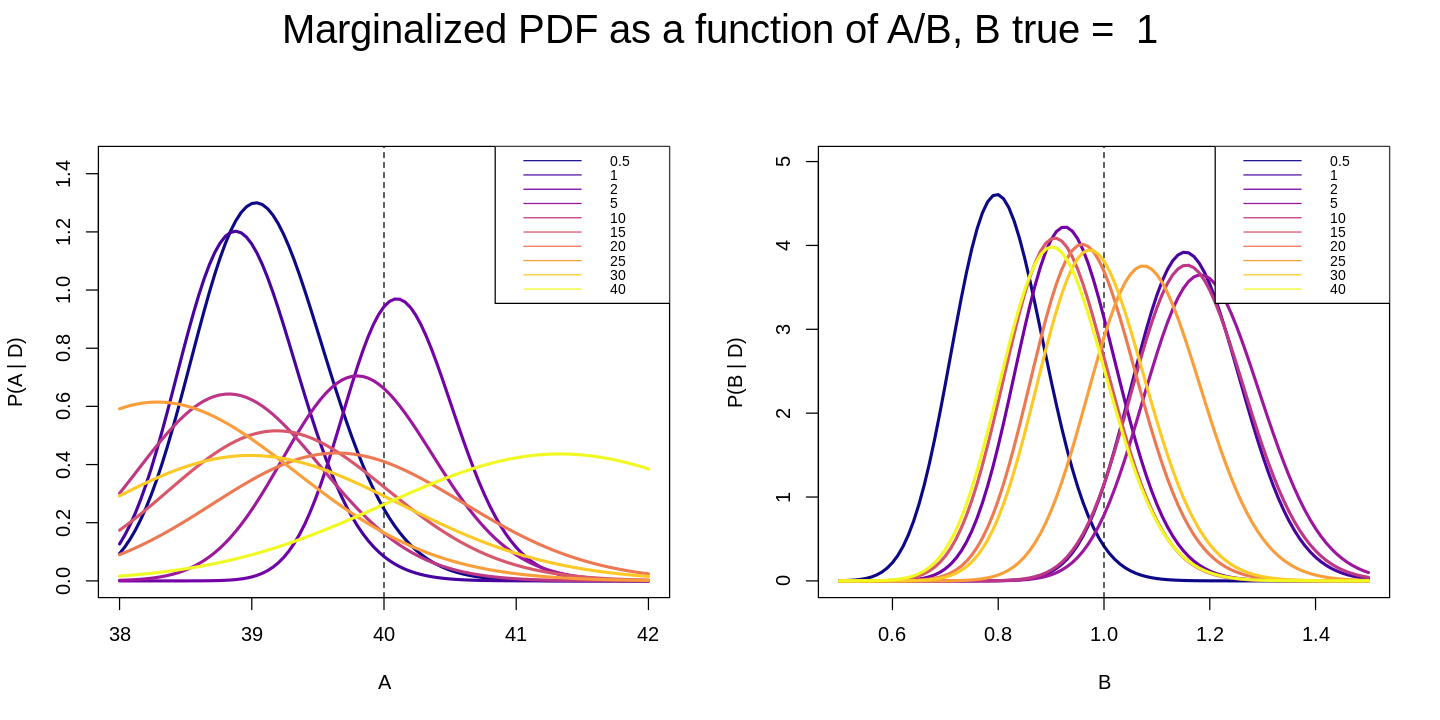

In [8]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1, 2), oma = c(0, 0, 2, 0))

plot(A.trues, A_max_list - A.trues, pch = 20, cex = 1.5, col ='slateblue2', xlab = 'A/B', ylab = 'max A- true A')
abline(h = 0, col = 'black', lty  = 2)

plot(A.trues, B_max_list - B.true, pch = 20, cex = 1.5, col = 'navy', xlab = 'A/B', ylab = 'max B - true A')
abline(h = 0, col = 'black', lty  = 2)
mtext(paste('Mode of the posterior as a function of A/B, B true = ', B.true), outer = TRUE, cex = 2)

########################################################################################################################
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1, 2), oma = c(0, 0, 2, 0))

plot(A.trues, MN_a - A.trues, pch = 20, cex = 1.5, col ='slateblue2', xaxt='n', xlab = 'A/B', ylab = 'mean A- true A', ylim = c(min(MN_a - A.trues)-max(SD_a),max(MN_a - A.trues)+max(SD_a)))
arrows(A.trues, MN_a - SD_a - A.trues, A.trues, MN_a + SD_a - A.trues, angle = 90, code = 3, length = .1)
abline(h = 0, col = 'black', lty  = 2)

plot(A.trues, MN_b, pch = 20, cex = 1.5, col = 'navy', xaxt='n', xlab = 'A/B', ylab = 'mean B', ylim = c(min(MN_b)-max(SD_b),max(MN_b)+max(SD_b)))
arrows(x0 = A.trues, y0 = MN_b - SD_b, x1 = A.trues, y1 = MN_b + SD_b, angle = 90, code = 3, length = .1)
abline(h = B.true, col = 'black', lty  = 2)
mtext(paste('Mean as a function of A/B, B true = ', B.true), outer = TRUE, cex = 2)

#######################################################################################################################

#Plot marginalized posteriors
colors <- plasma(length(A.trues))

options(repr.plot.width=12, repr.plot.height=6)

ylim = c(0, max(p_a_D)+1)
par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(A.seq, p_a_D_list[1,], xlab= 'A', ylab = 'P(A | D)', type='l', lwd=2.5, col = colors[1], ylim = ylim)
abline(v = A.true, lty = 2)
for (n in 2:length(A.trues)){
    par(new=TRUE)   
    plot(A.seq, p_a_D_list[n,], xlab= '', ylab = '', type='l', lwd=2.5, col = colors[n], ylim = ylim, axes = FALSE, ann = FALSE)
}
legend('topright', legend = A.trues, col = colors, lty = 1, cex=0.7)

ylim = c(0, max(p_b_D)+1)
plot(B.seq, p_b_D_list[1,], xlab= 'B', ylab = 'P(B | D)', type='l', lwd=2.5, col = colors[1], ylim = ylim)
abline(v = B.true, lty = 2)
for (n in 2:length(A.trues)){
    par(new=TRUE)   
    plot(B.seq, p_b_D_list[n,], xlab= '', ylab = '', type='l', lwd=2.5, col = colors[n], ylim = ylim, axes = FALSE, ann = FALSE)
}
legend('topright', legend = A.trues, col = colors, lty = 1, cex=0.7)

mtext(paste('Marginalized PDF as a function of A/B, B true = ', B.true), outer = TRUE, cex = 2)

Increasing the ratio, we see that there are fluctuations in the mode and mean value around the true value: there seems no explicit dependence on the ratio.